<h3> Mall Customer Segmentation (Clustering) and Classification Project </h3>

Data From: https://www.kaggle.com/code/micheldc55/mall-customer-segmentation-model-interpretation/notebook

<h4> Loading Data </h4>

In [196]:
import pandas as pd
import joblib

In [197]:
data = pd.read_csv('segmentation_data.csv')
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [198]:
data = data.drop(columns = 'ID', axis = 1)
data


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


<h4> Imports </h4>

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for Pearson correlation coefficient
%matplotlib inline

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [90]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [91]:
cat_cols = ['Sex', 'Marital status'	, 'Education', 'Occupation', 'Settlement size']
num_cols = ['Age', 'Income']

<h3> Visualizing distribution of the Numerical Variables (Age & Income) </h3>

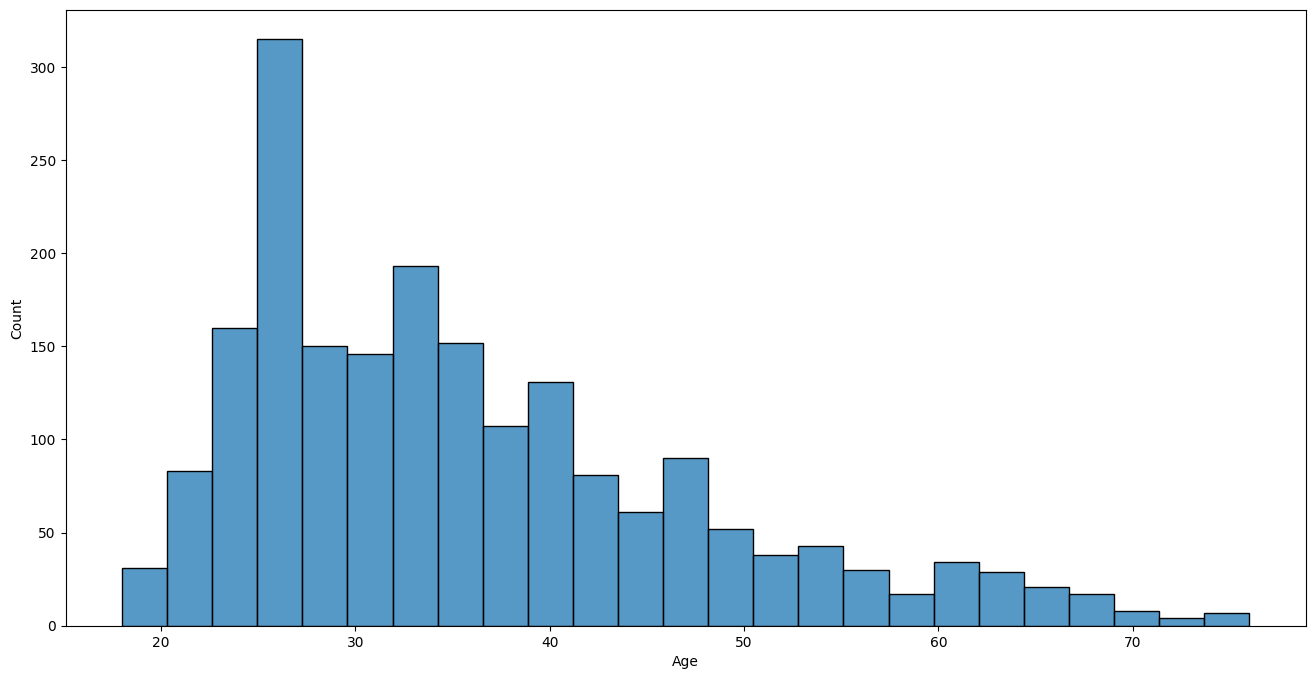

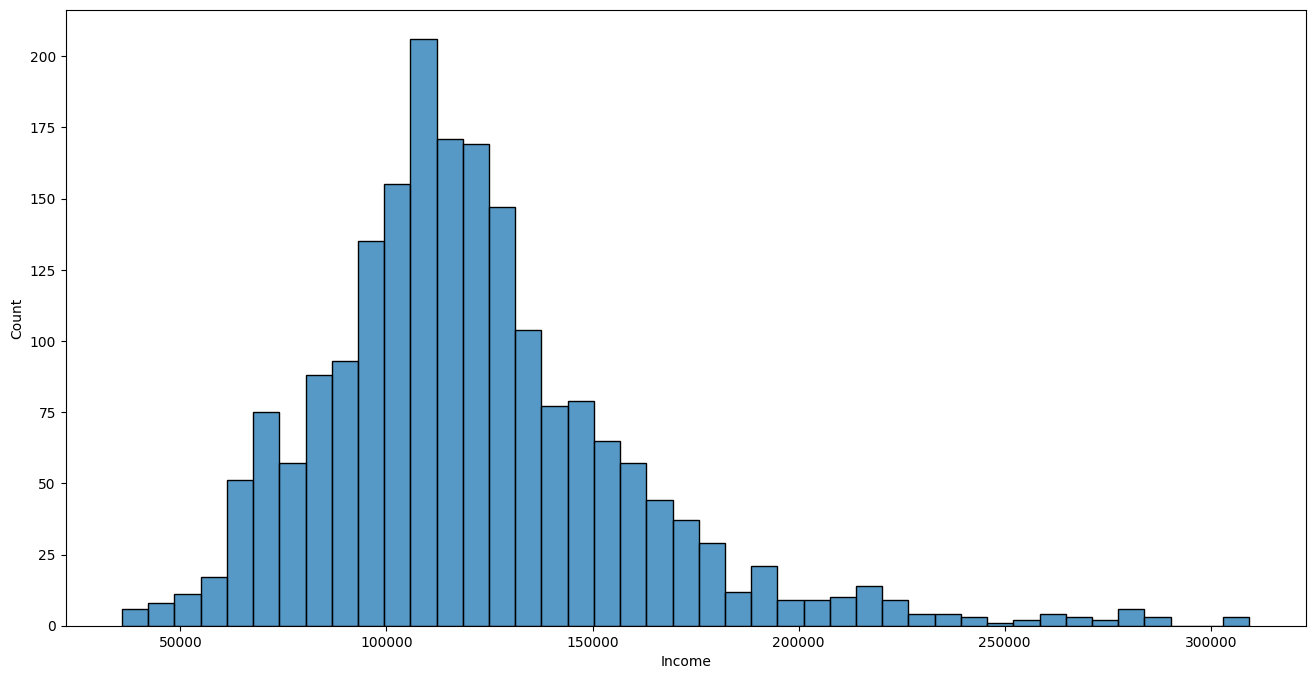

In [92]:
for col in num_cols:
  plt.figure(figsize=(16, 8))
  sns.histplot(data = data, x = col)

<h3> Visualizing the distribution of the Categorical Variables </h3>

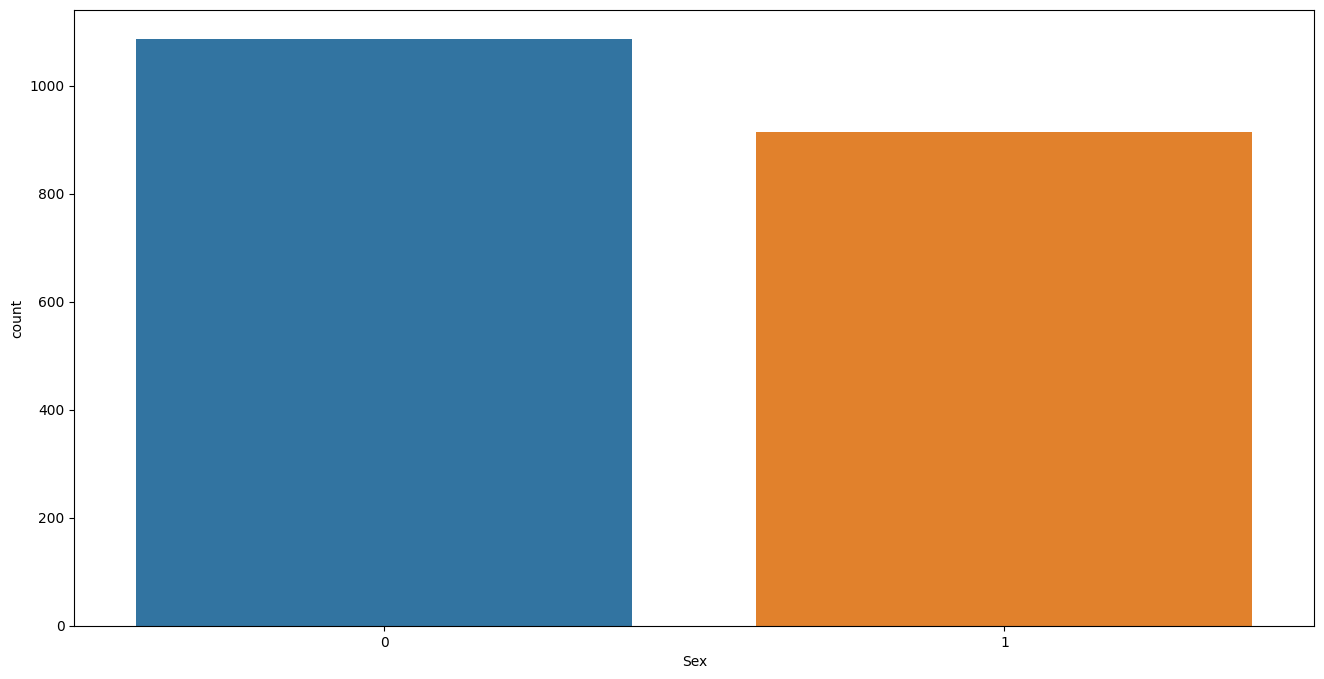

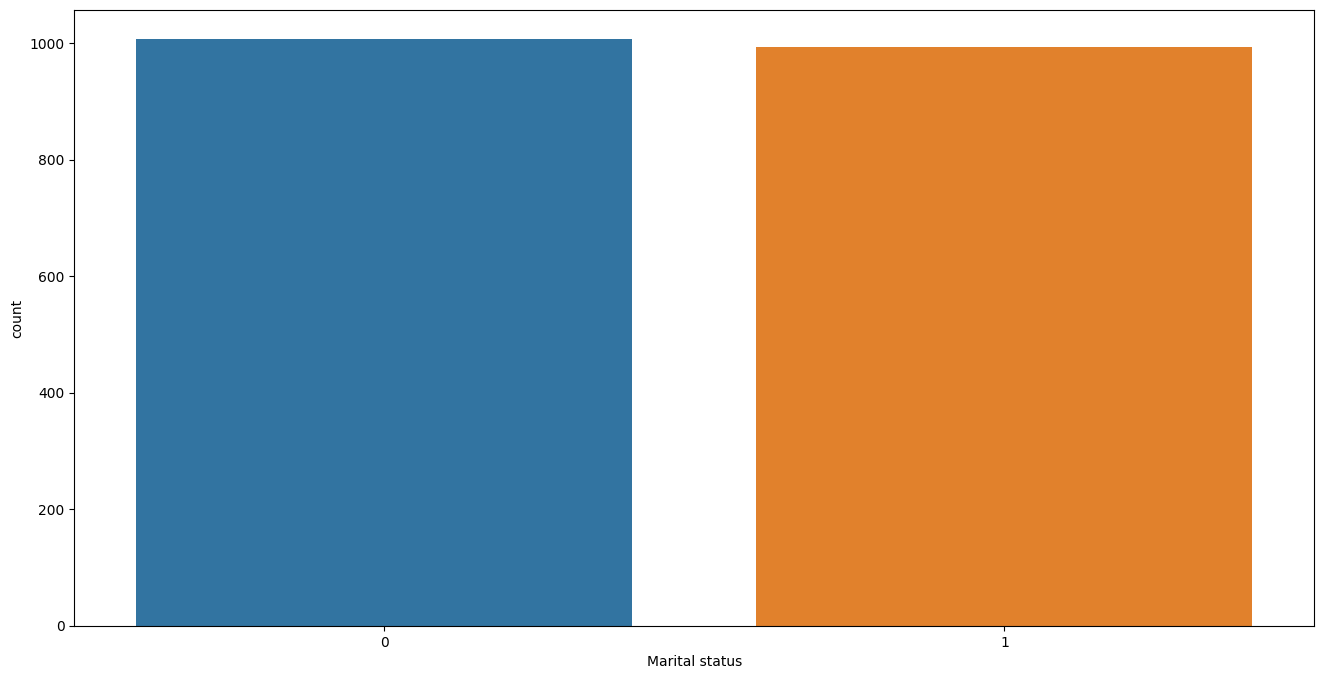

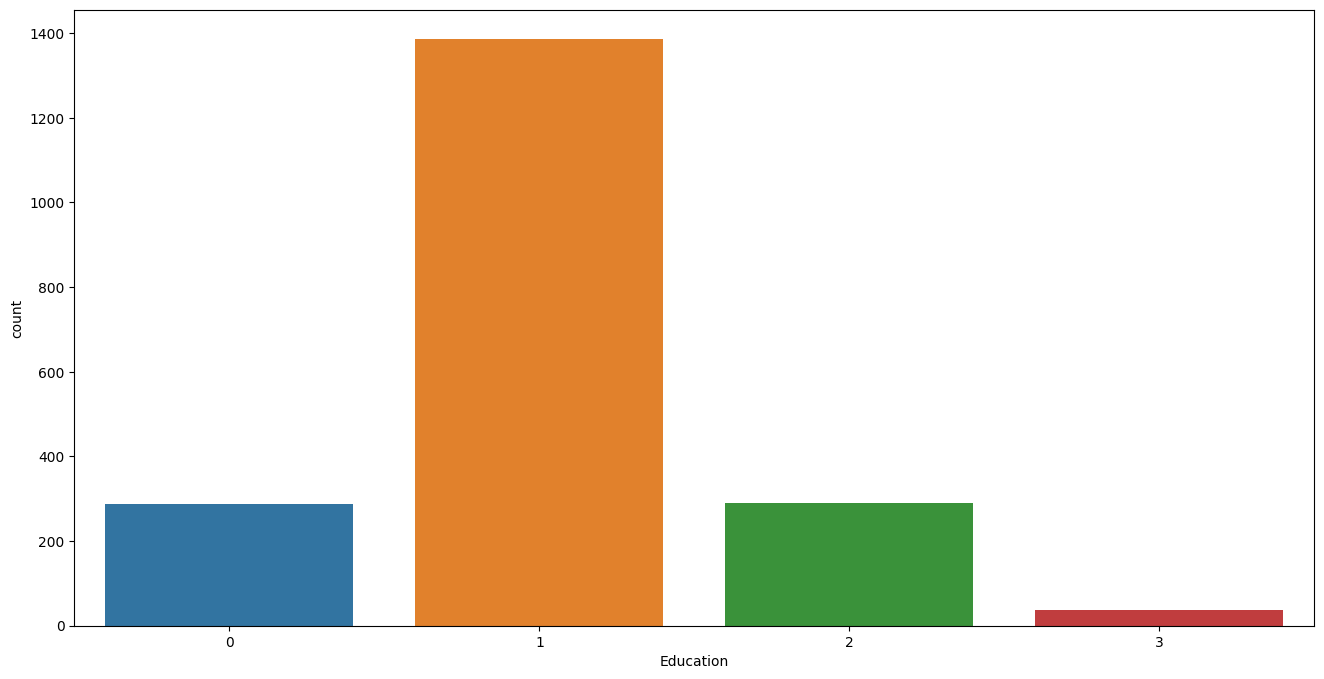

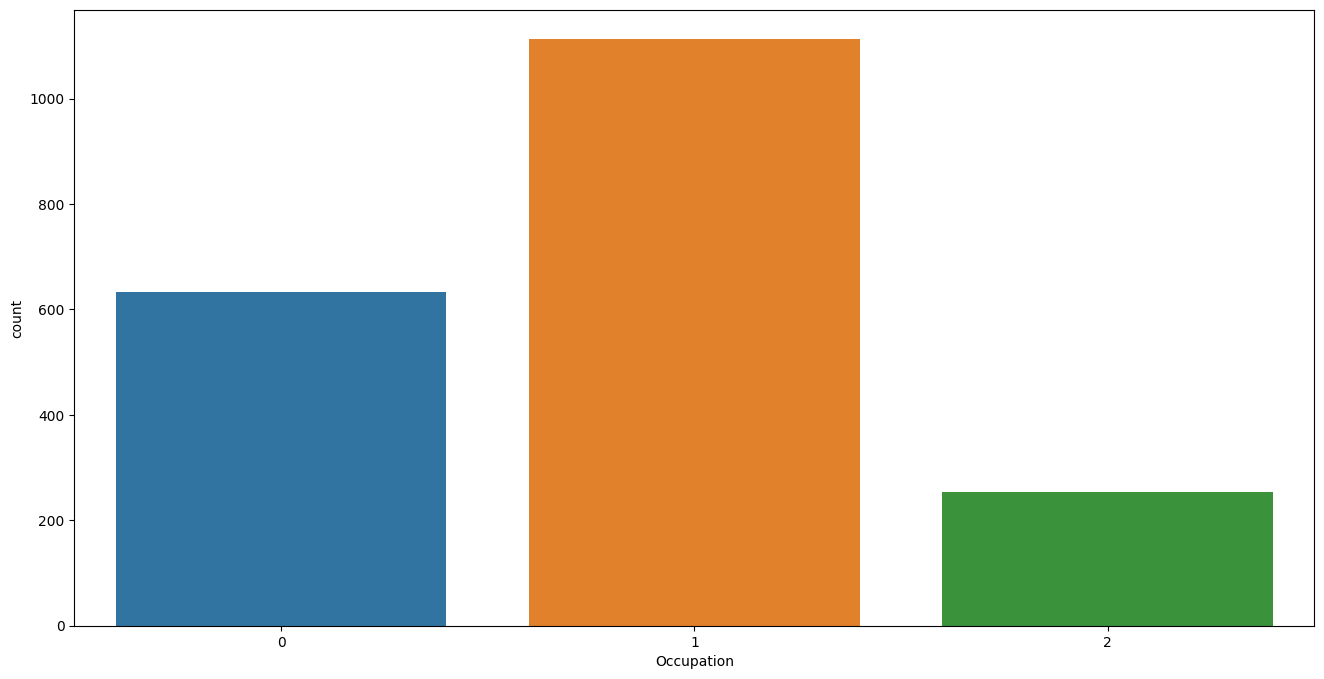

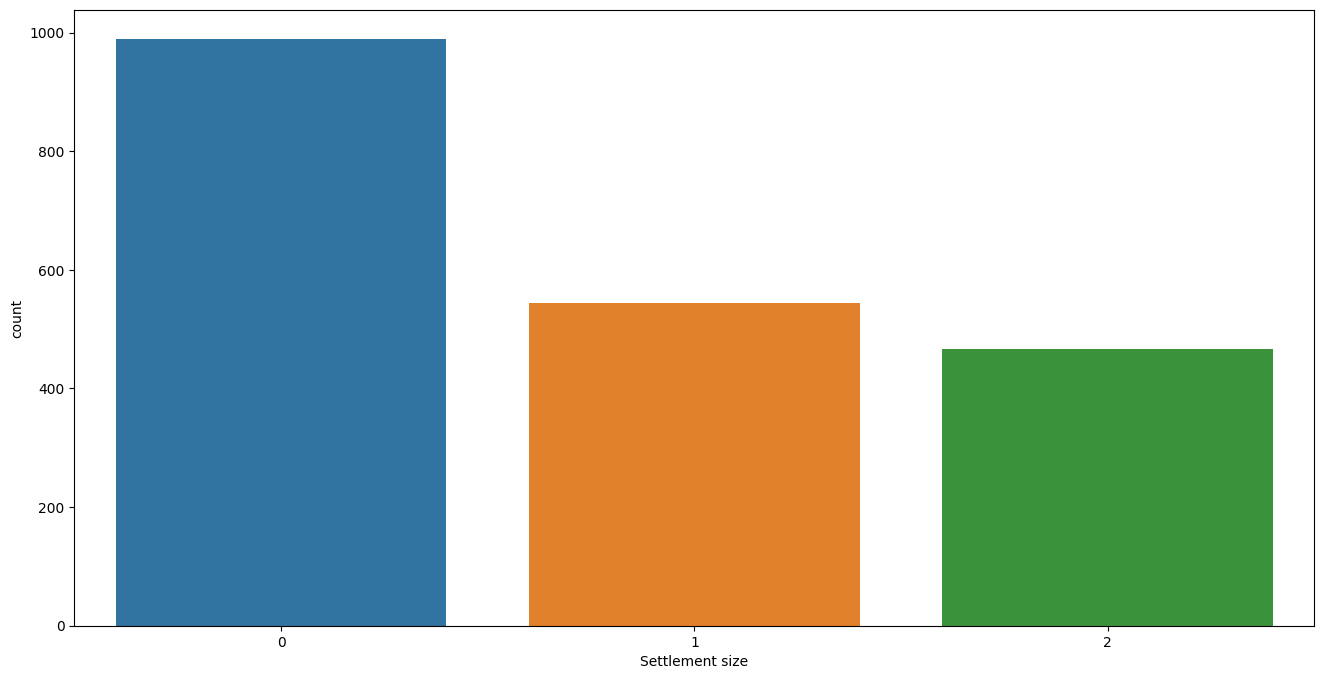

In [93]:
for col in cat_cols:
  plt.figure(figsize = (16, 8))
  sns.countplot(data = data, x = col)

<h4> Bivariate Analysis (Age & Income) </h4>

<AxesSubplot:xlabel='Age', ylabel='Income'>

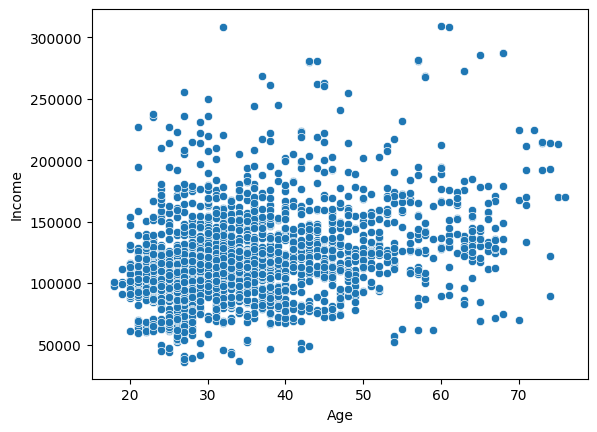

In [94]:
sns.scatterplot(x = 'Age', y = 'Income', data = data)

In [95]:
age_income_coefficient = stats.pearsonr(data['Age'], data['Income'])
print(age_income_coefficient[0] * 100)

34.061016373173516


low correlation: 34.06 %

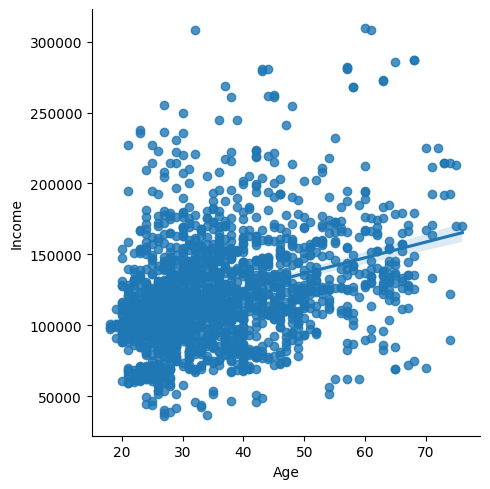

In [96]:
sns.lmplot(x='Age', y ='Income', data = data)


Distribution of Categorical Variables of the Numerical Variables (by using kdePlot)

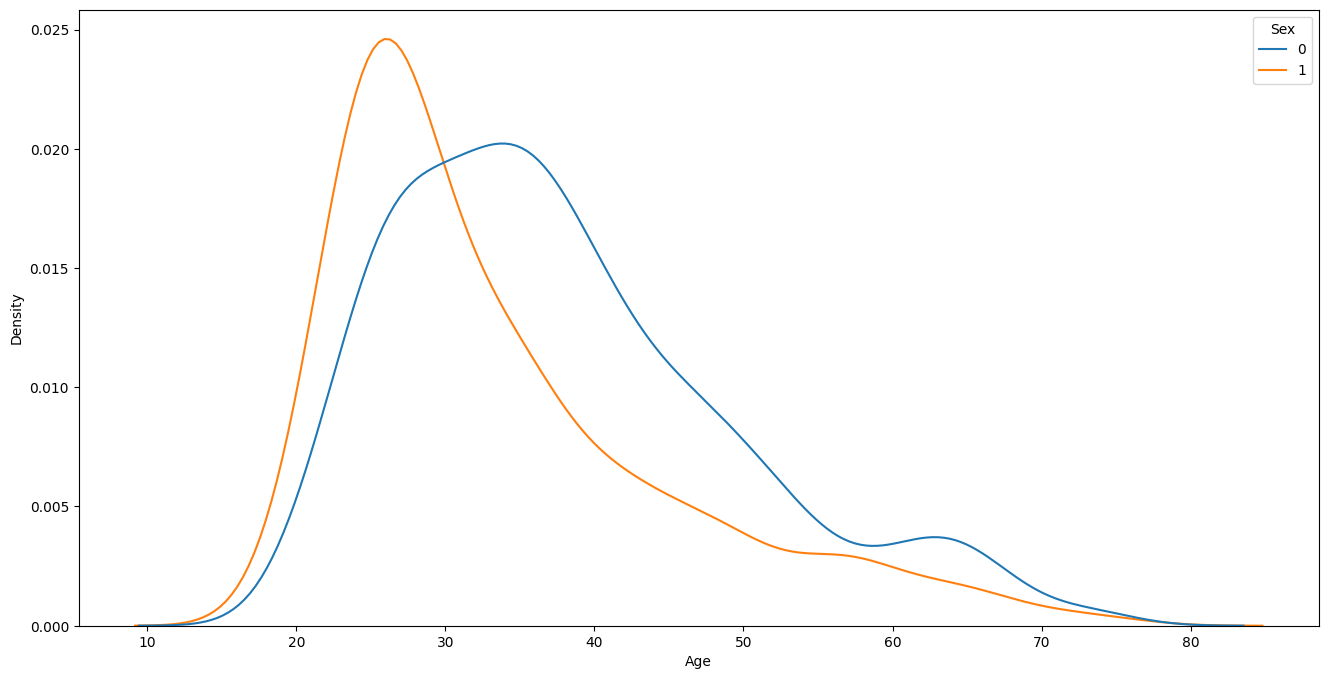

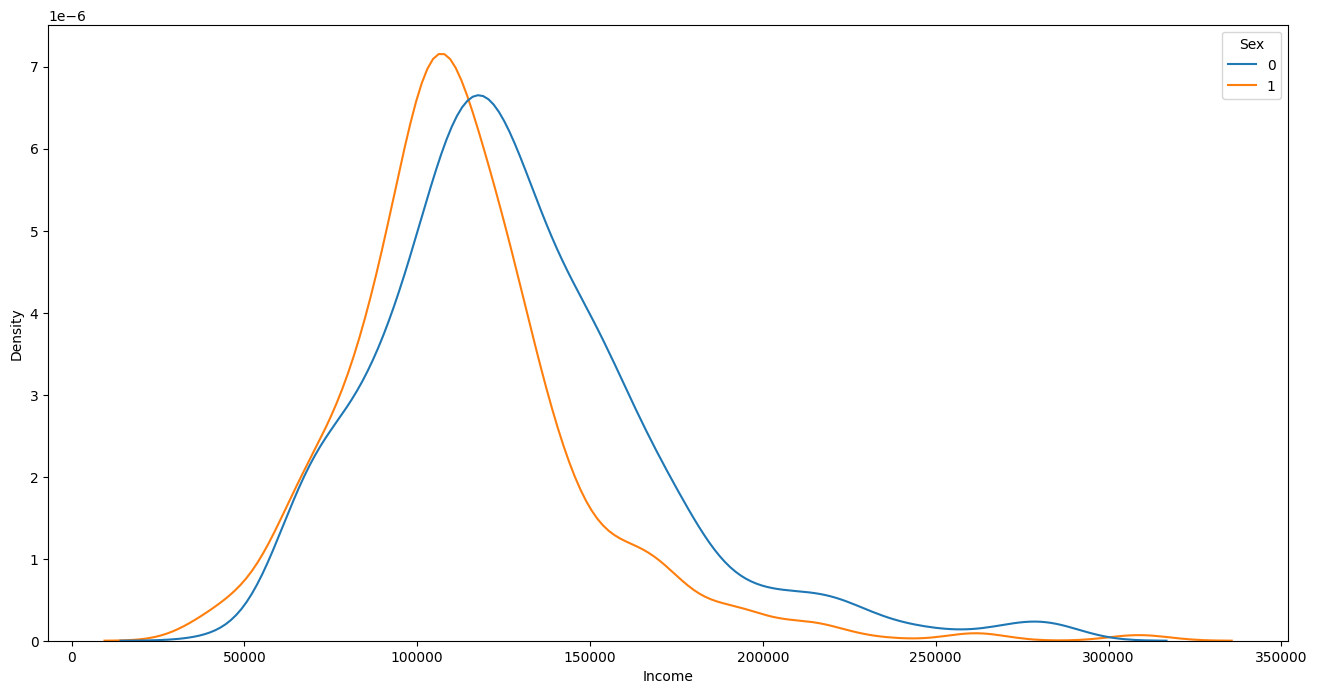

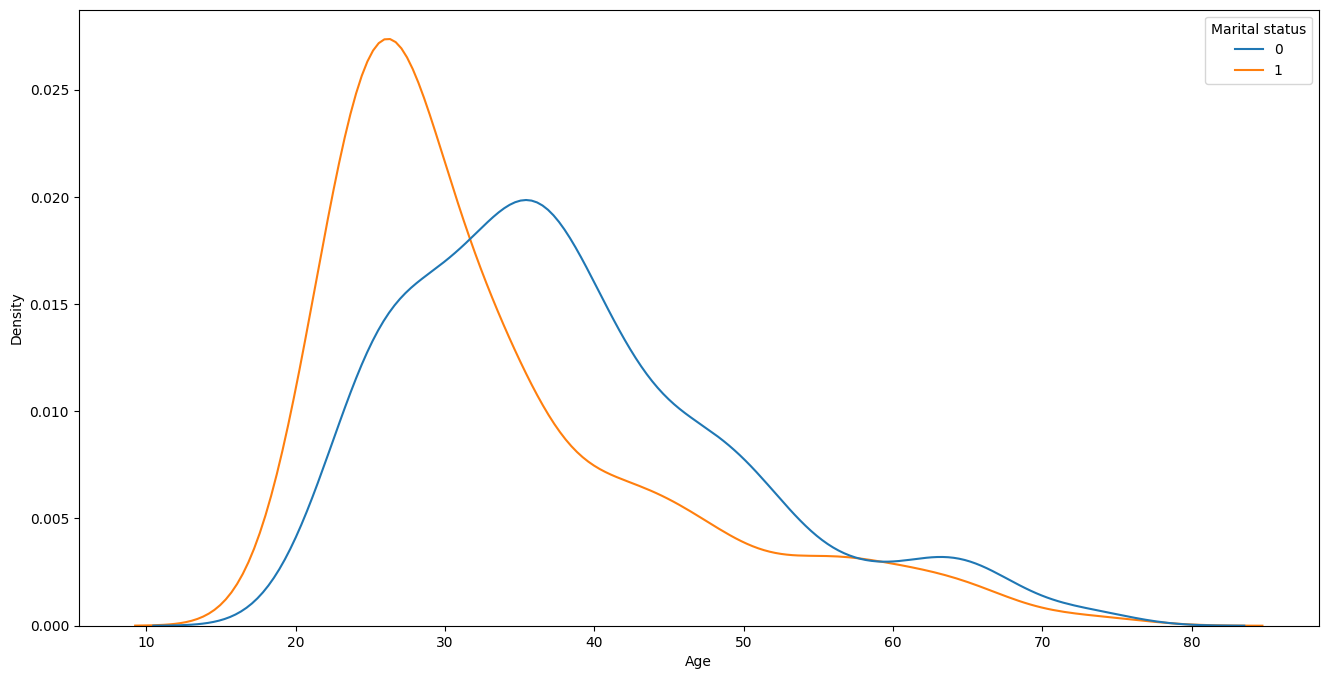

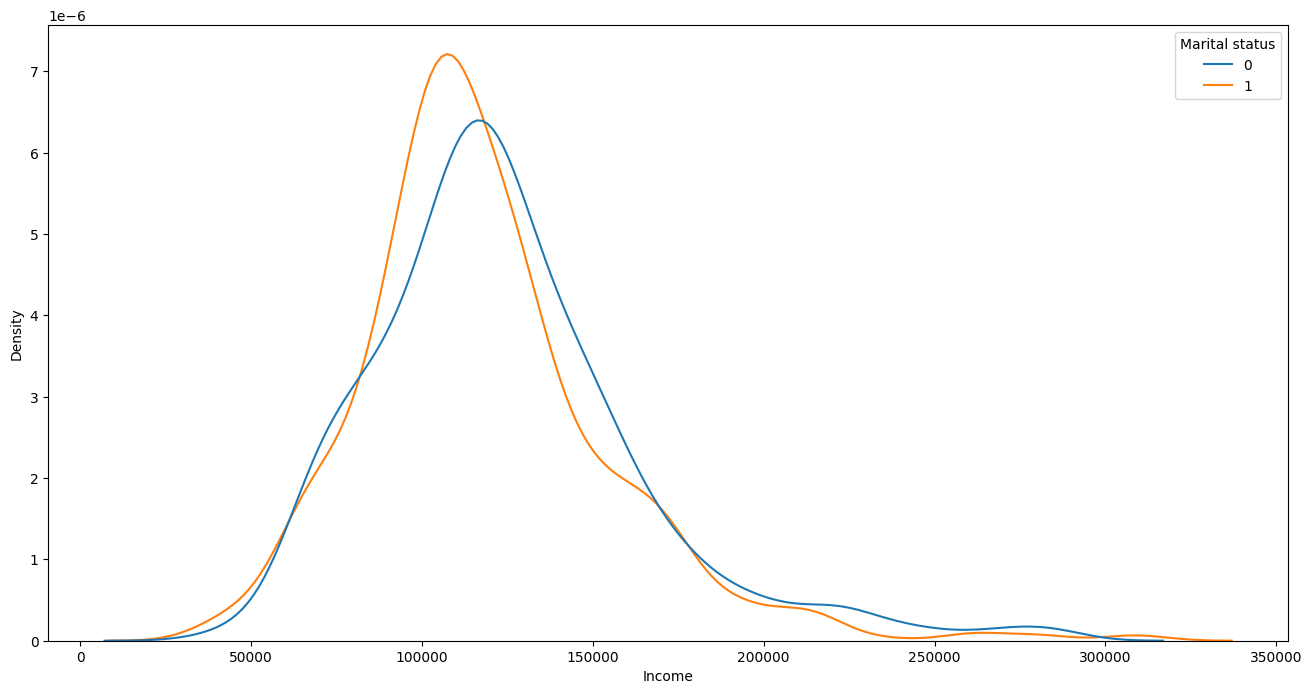

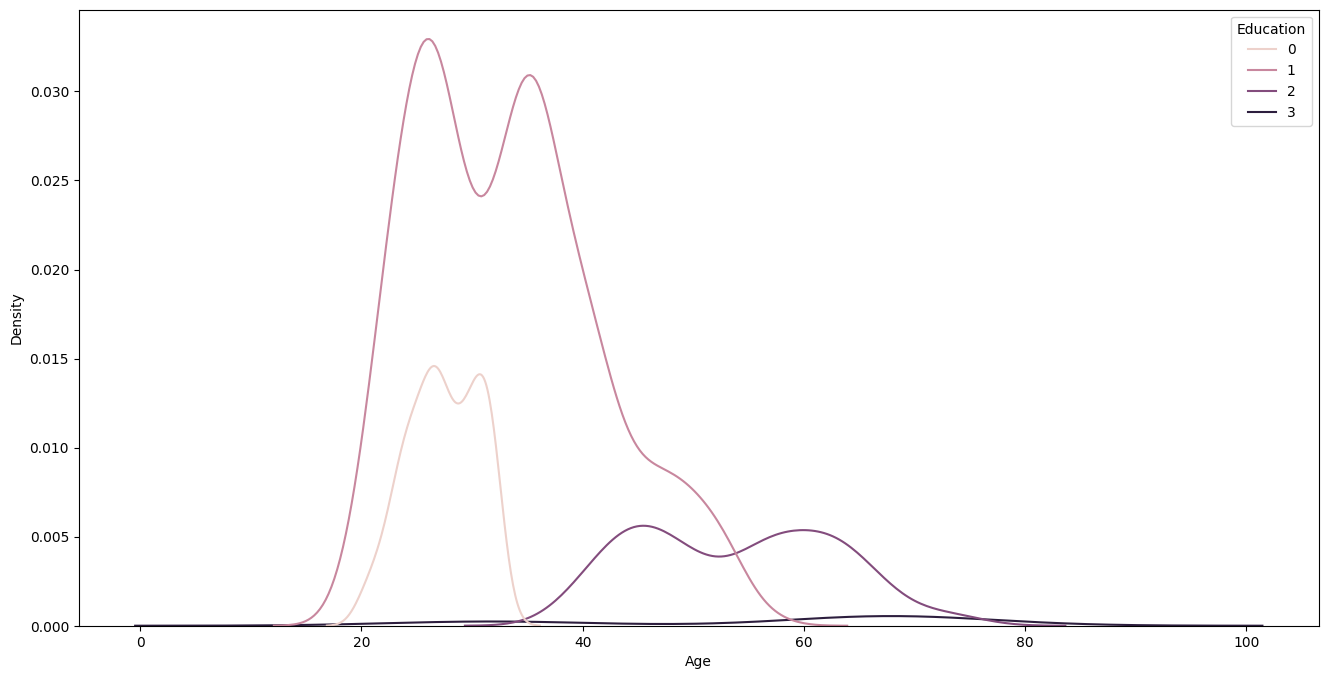

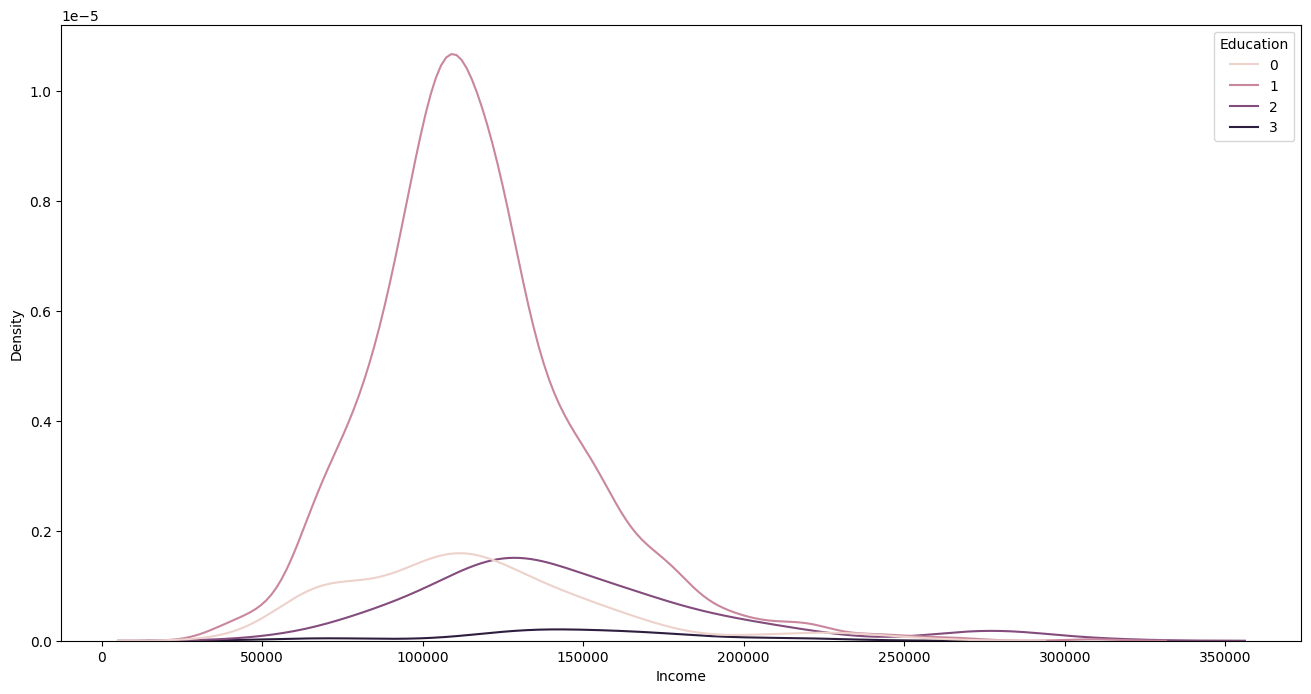

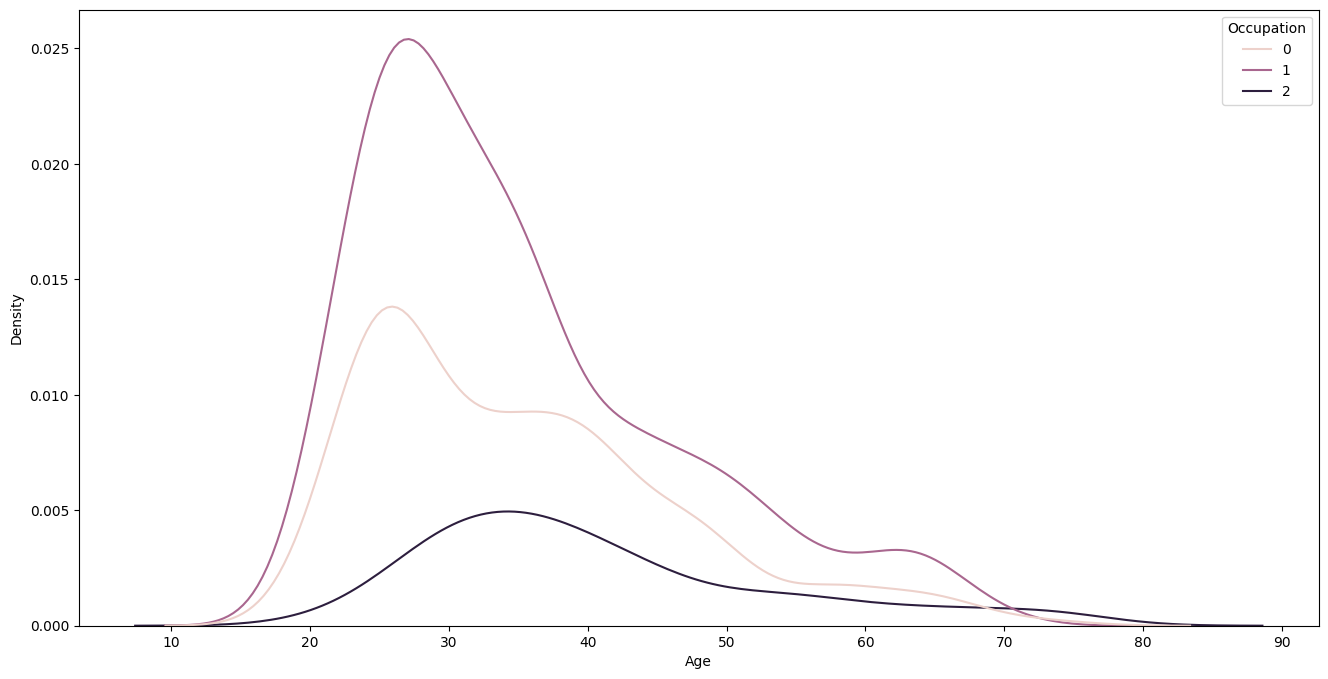

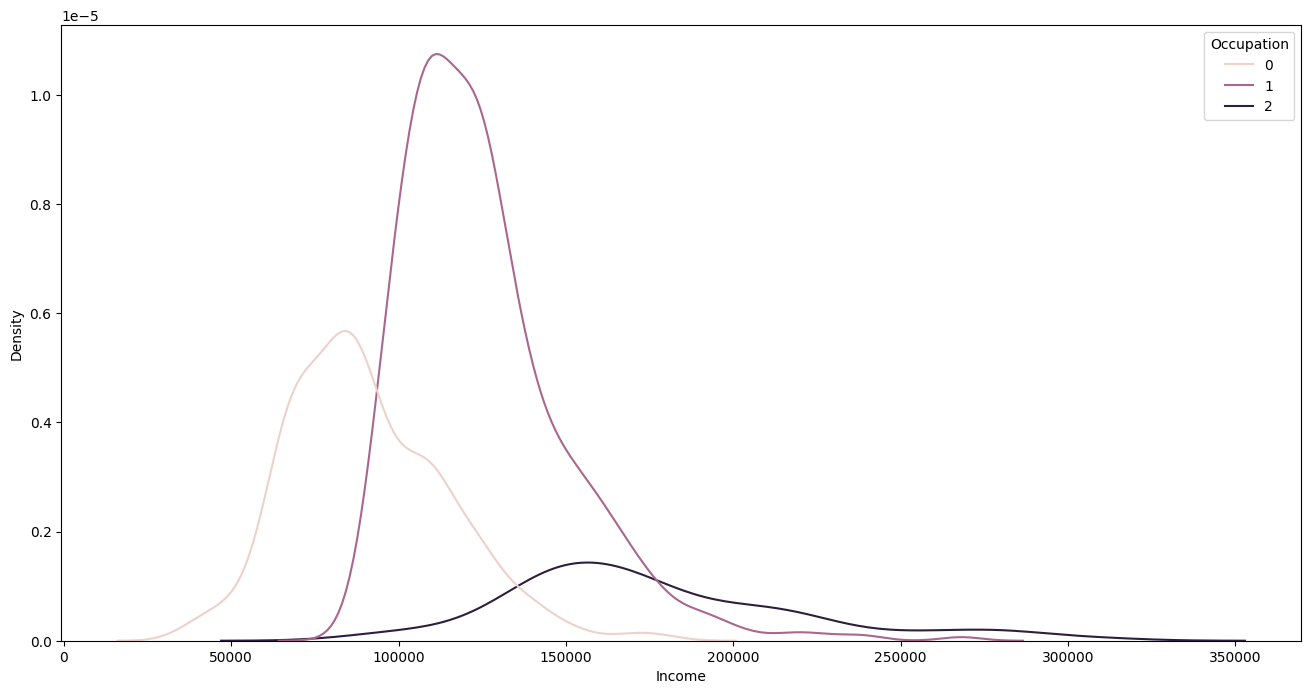

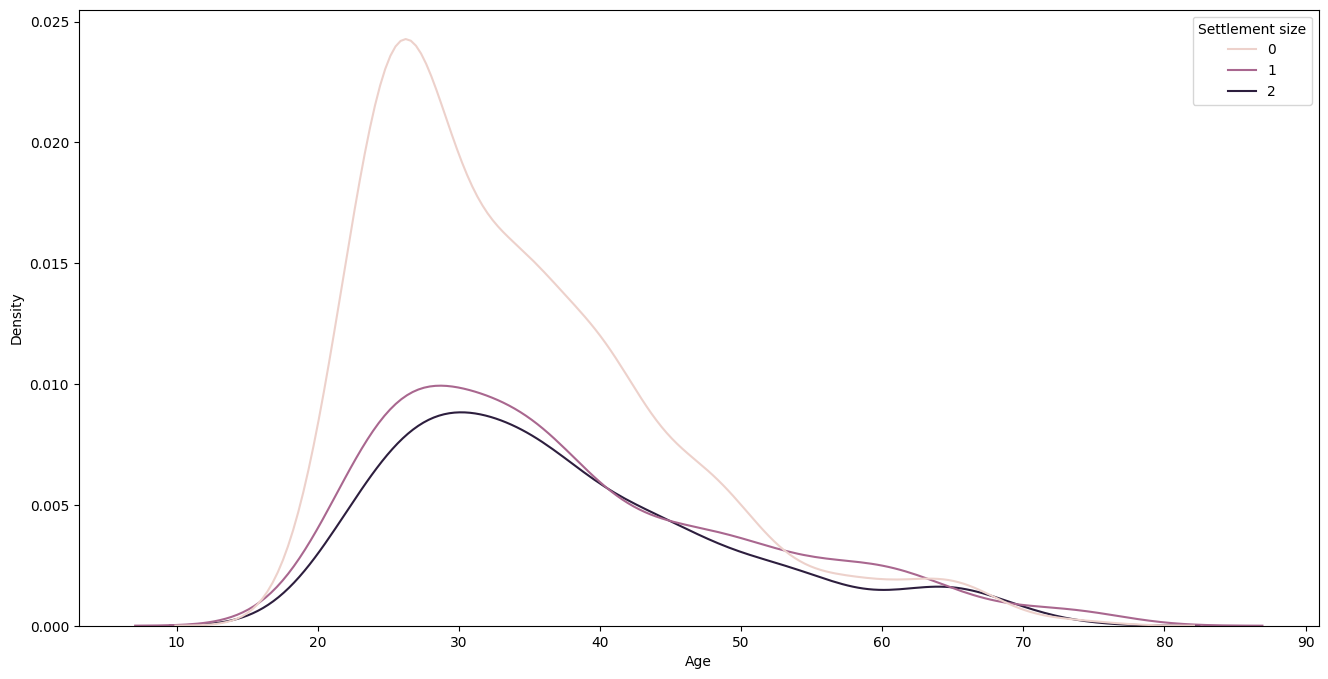

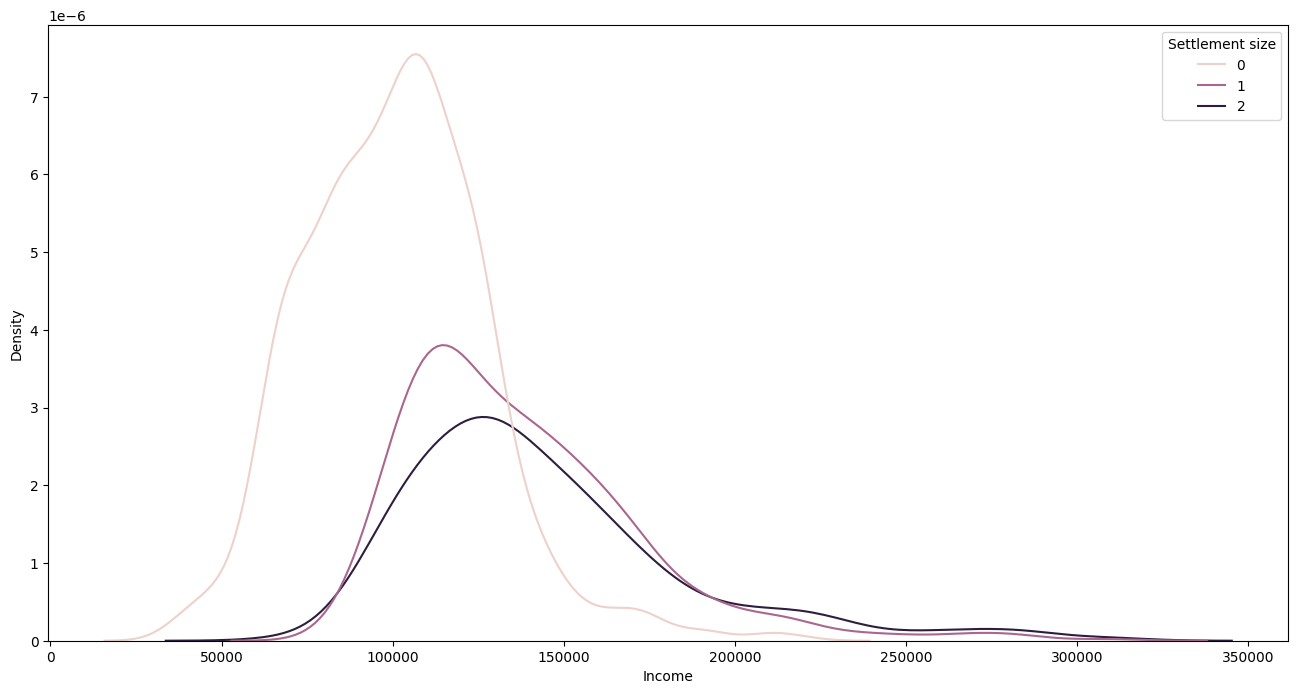

In [97]:
for categorical_var in cat_cols:
  for numerical_var in num_cols:
    plt.figure(figsize=(16, 8))
    sns.kdeplot(data = data, x = numerical_var, hue = categorical_var)

Distribution of Categorical Variables of the Numerical Variables (by using countPlot)

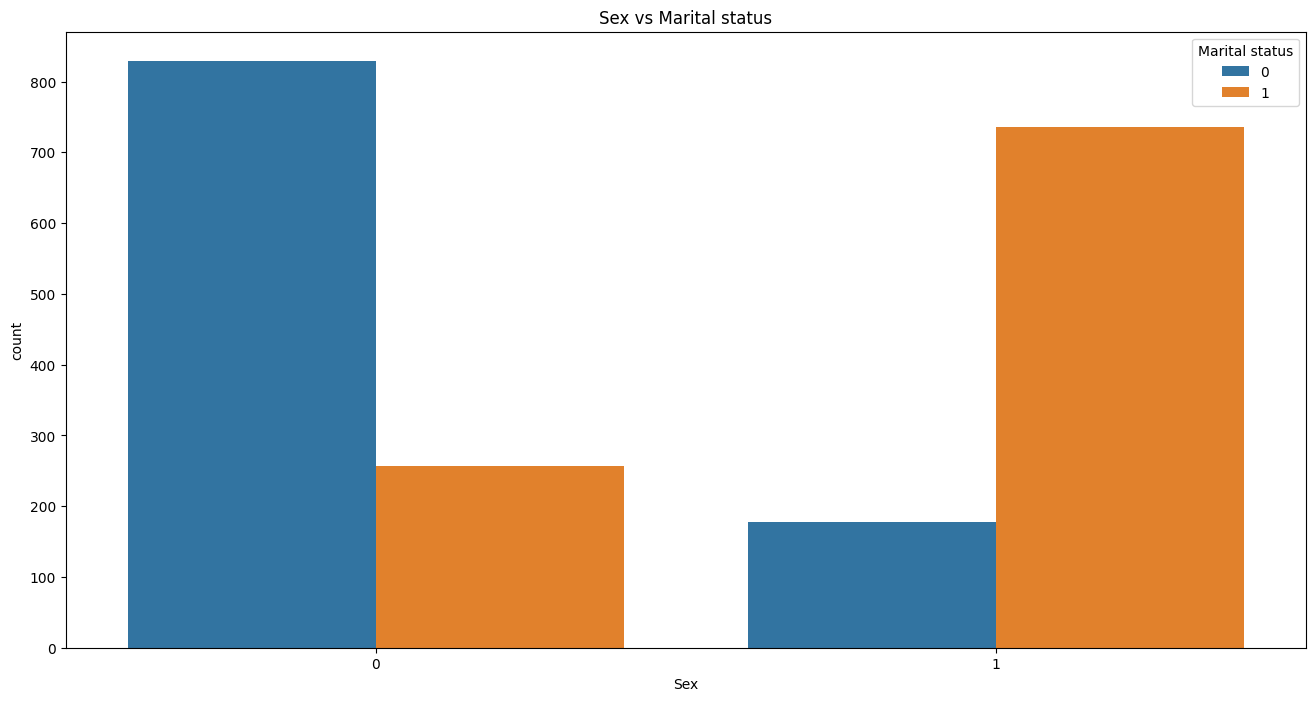

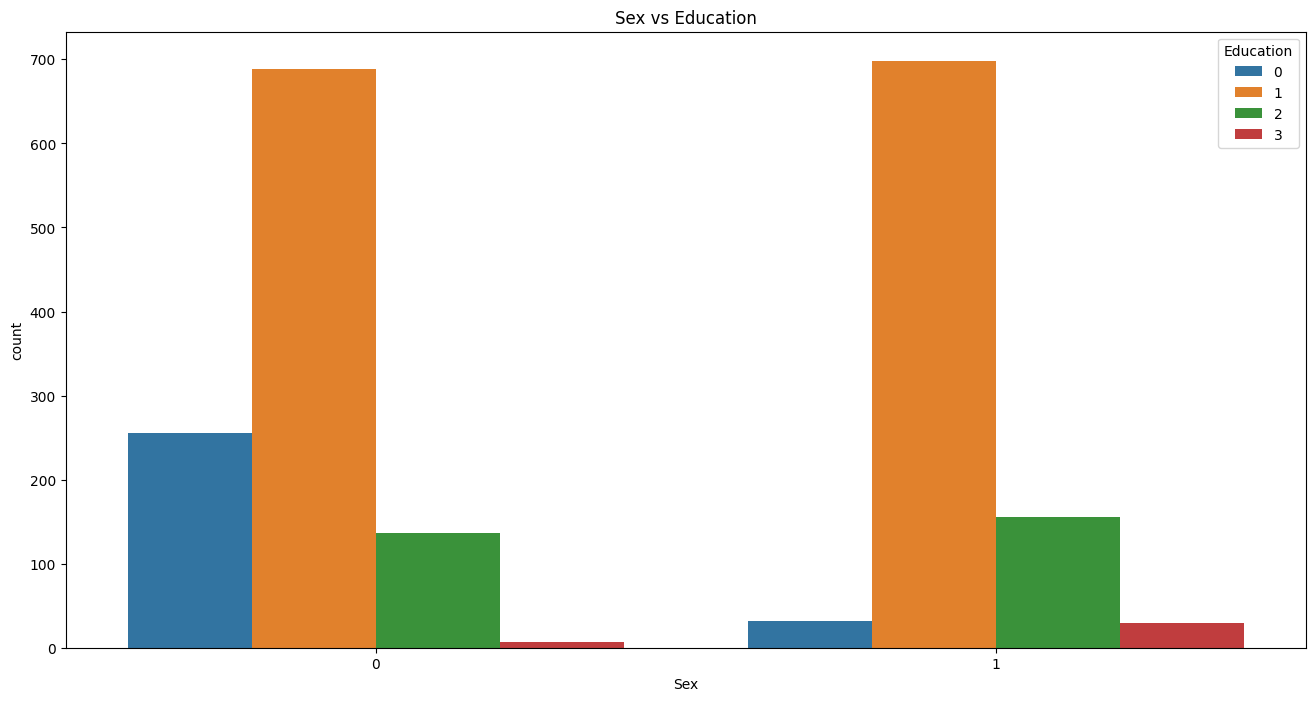

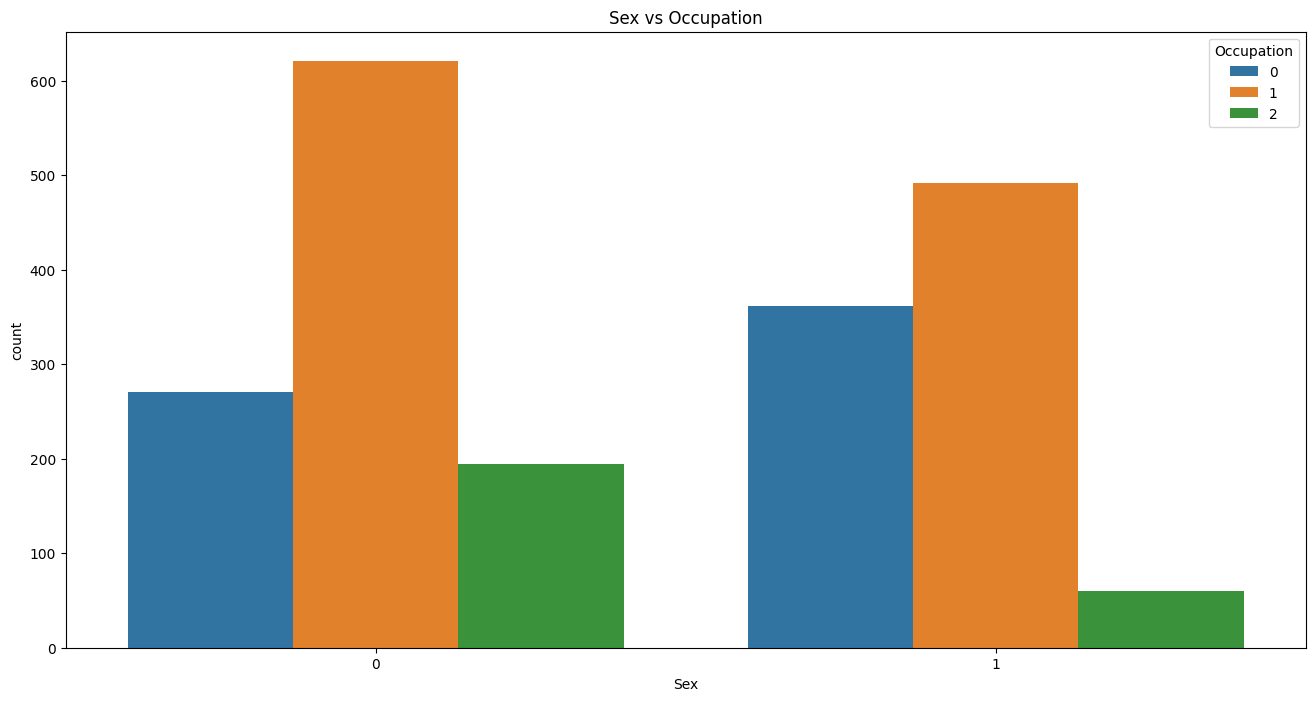

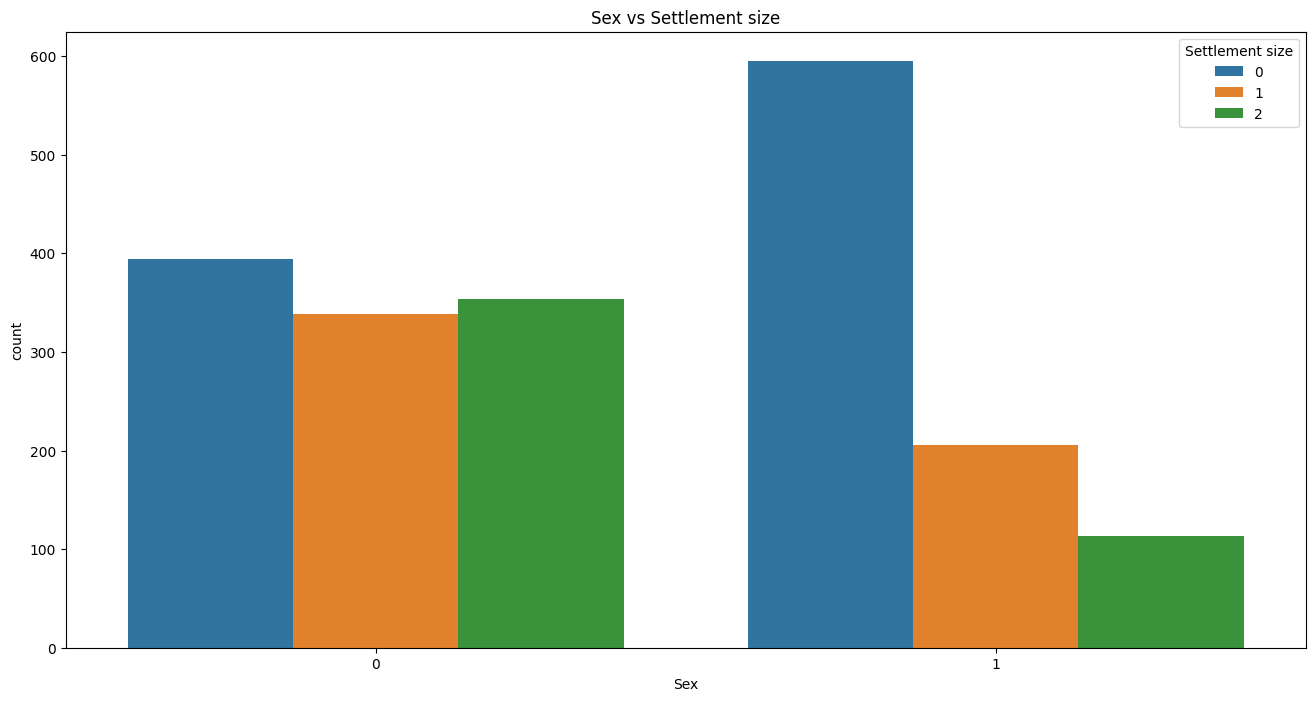

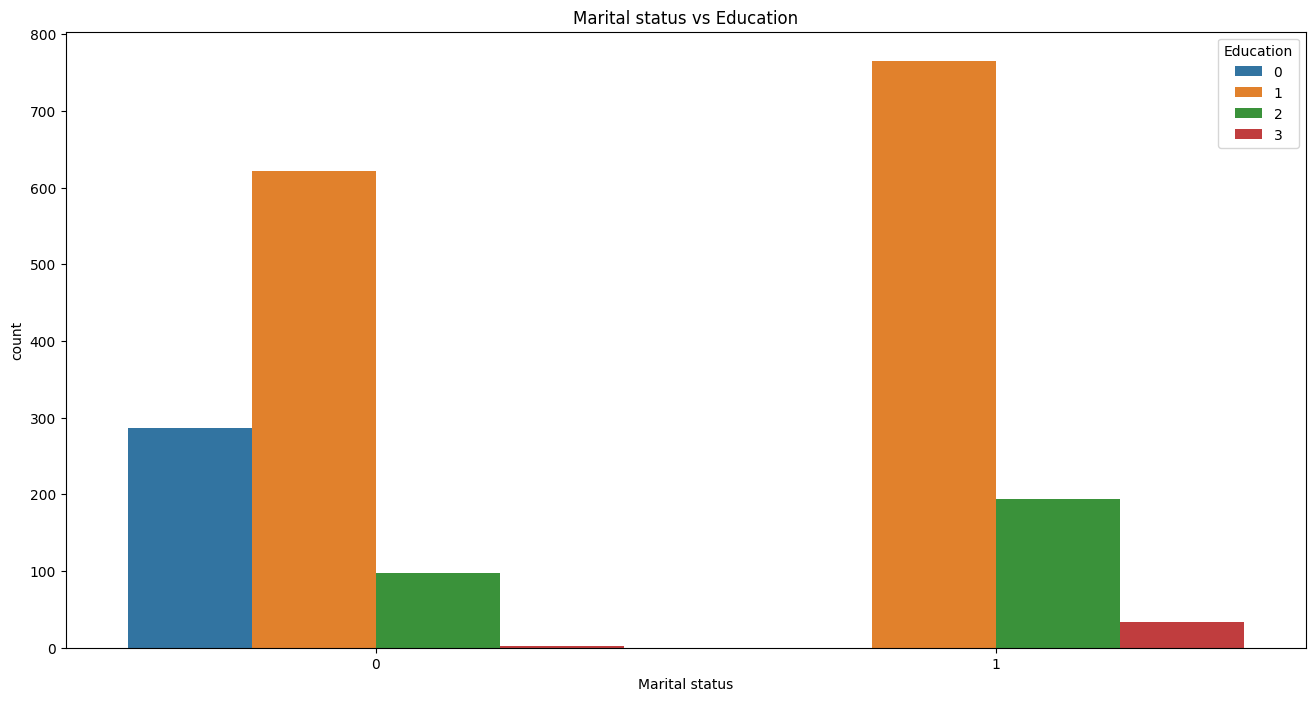

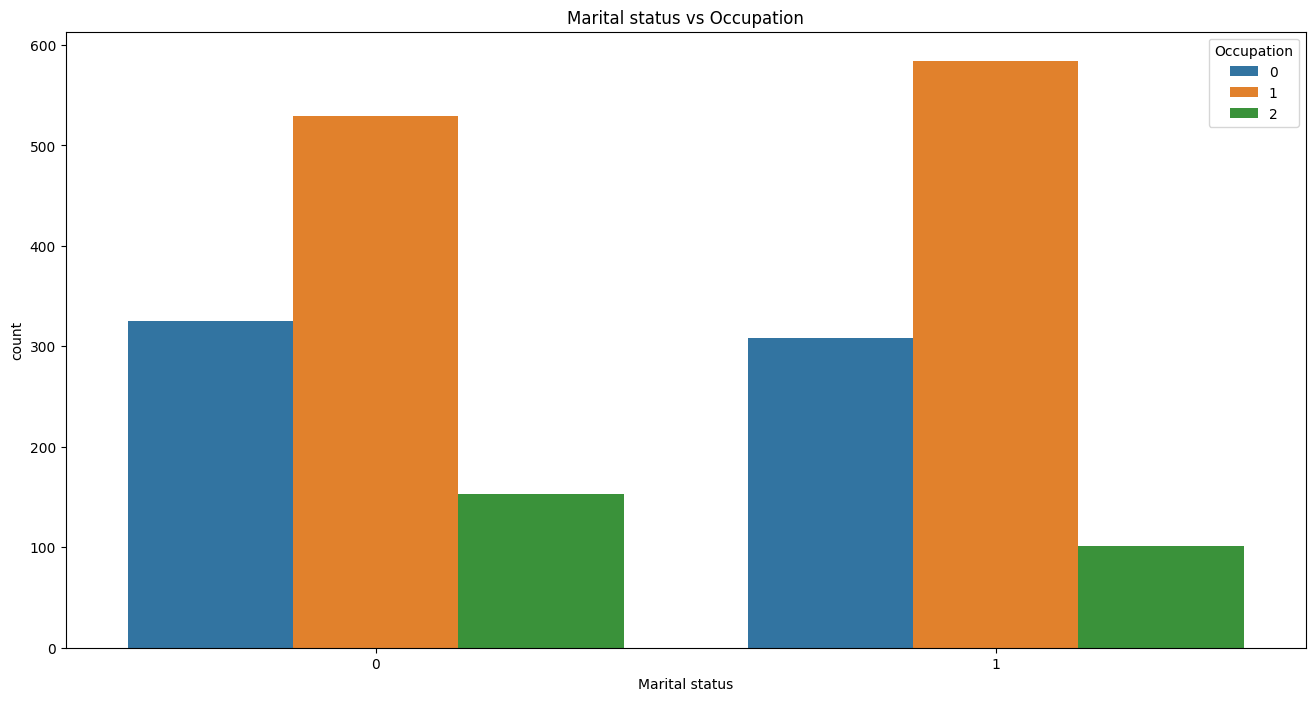

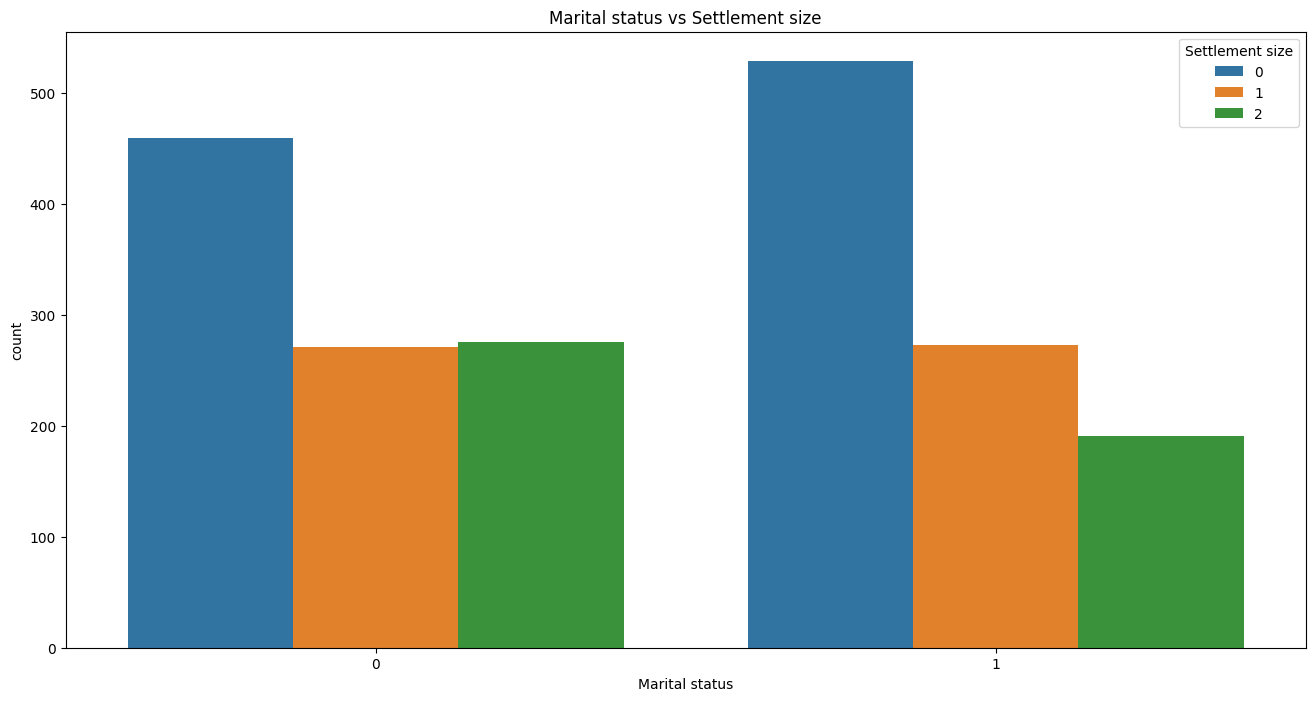

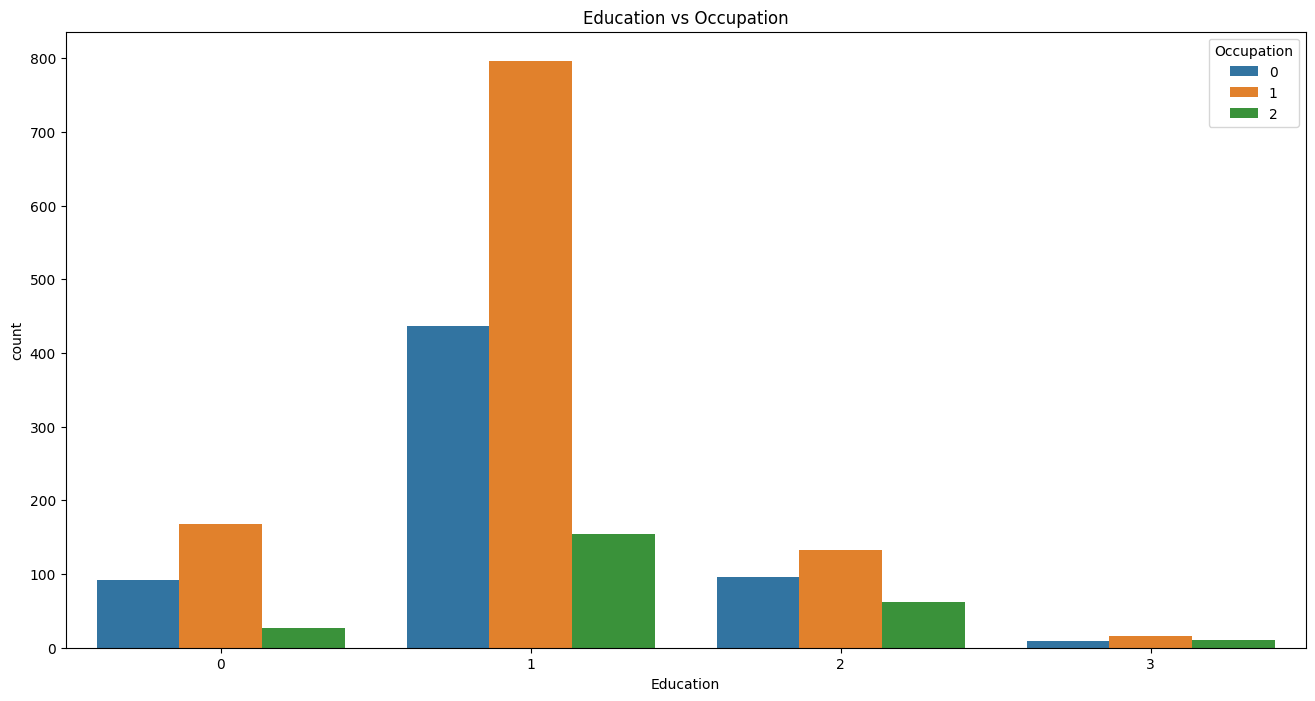

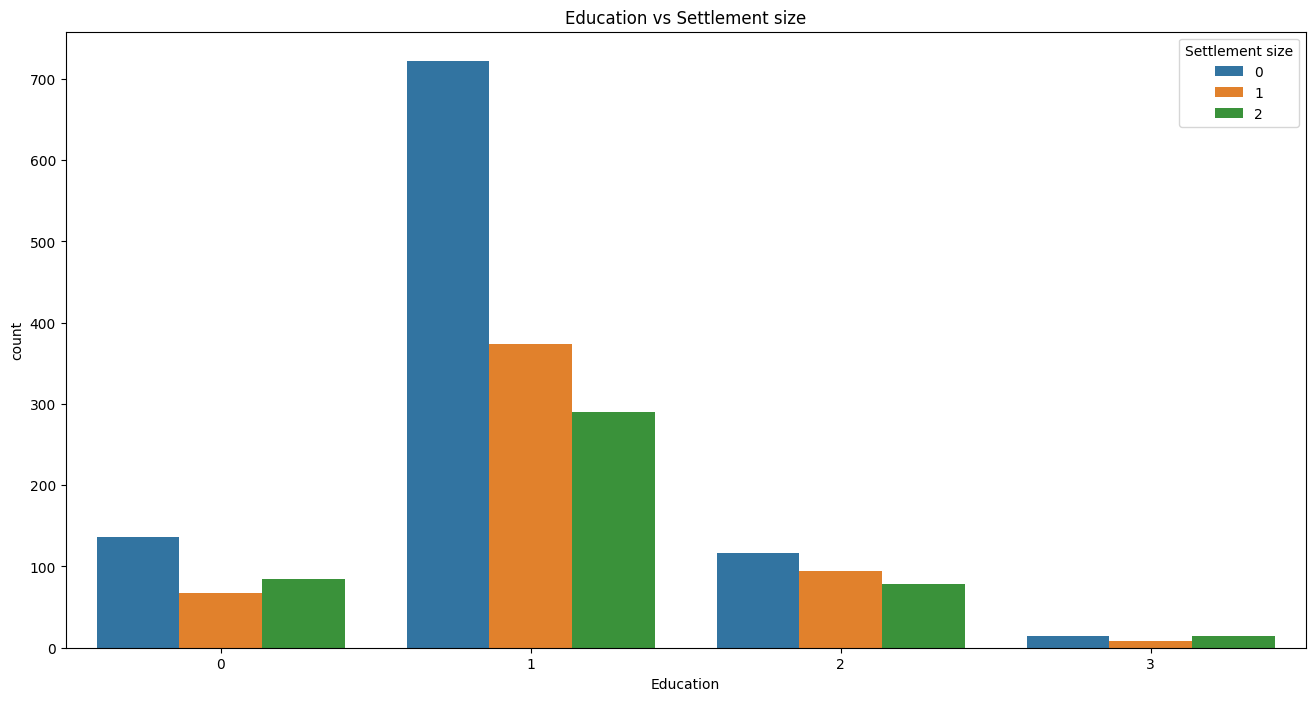

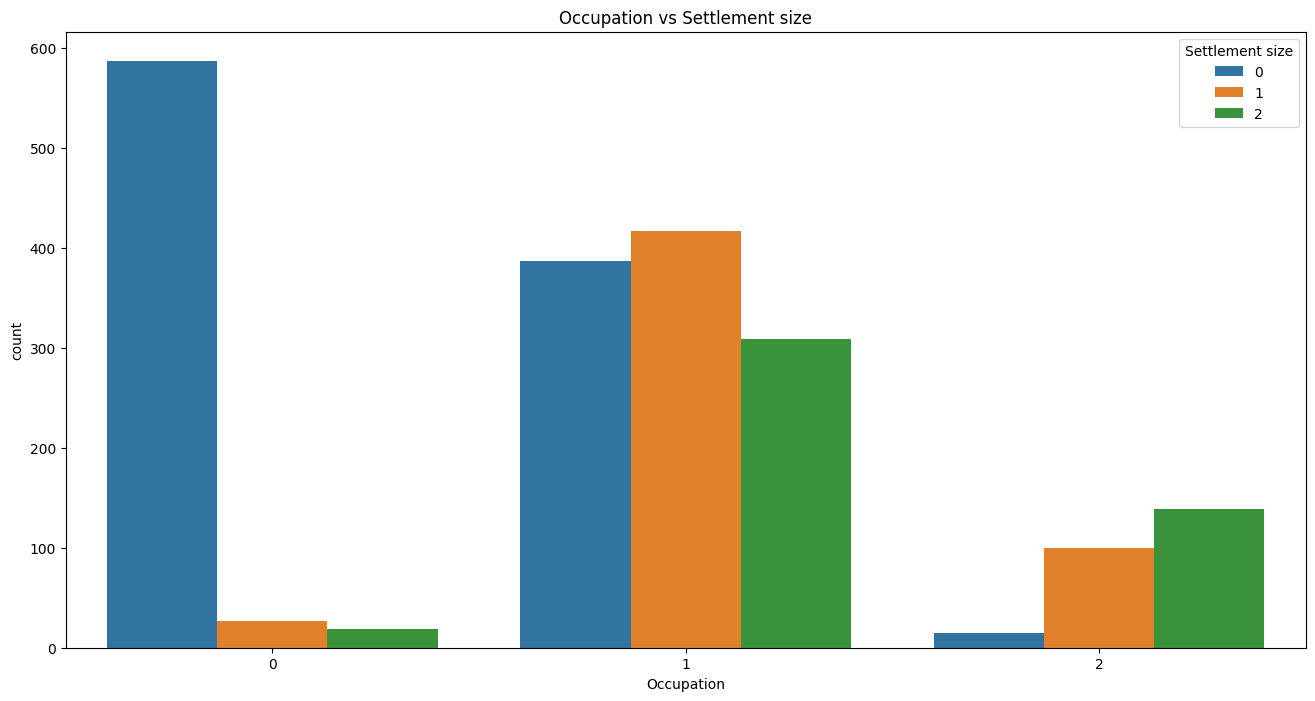

In [98]:
cat_aux = cat_cols.copy()
for category1 in cat_cols:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(16,8))
            title = category1 + " vs " + category2
            
            sns.countplot(data=data, x=category1, hue=category2).set_title(title)
            


<h3> MultiVariate Analysis </h3>

In [99]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(12,12))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)


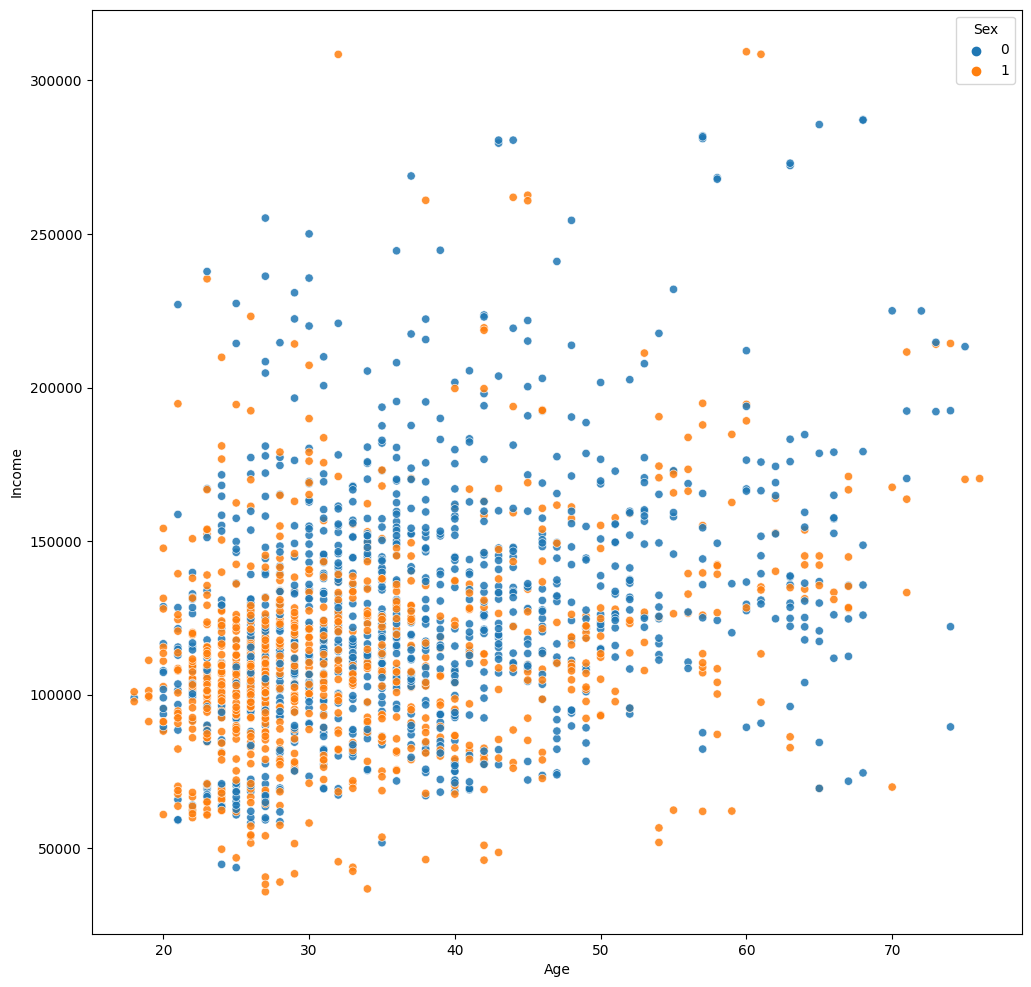

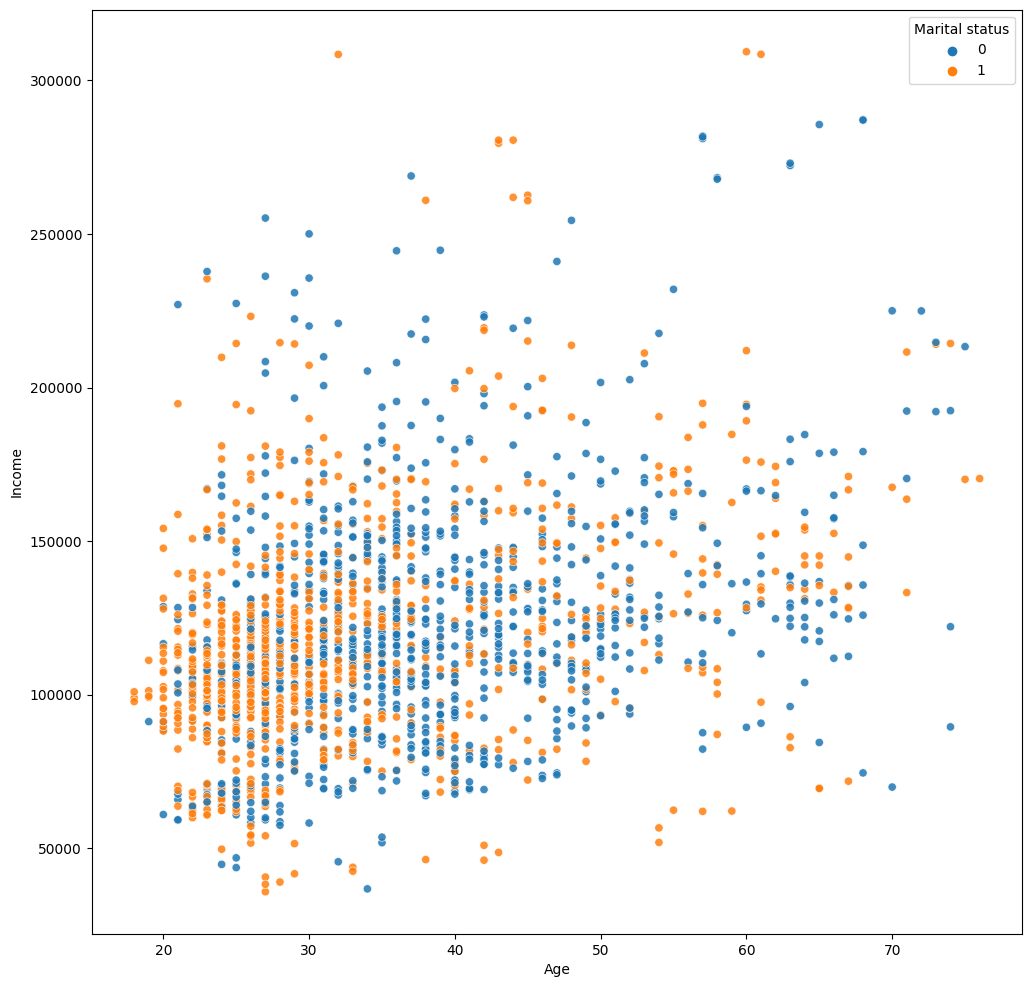

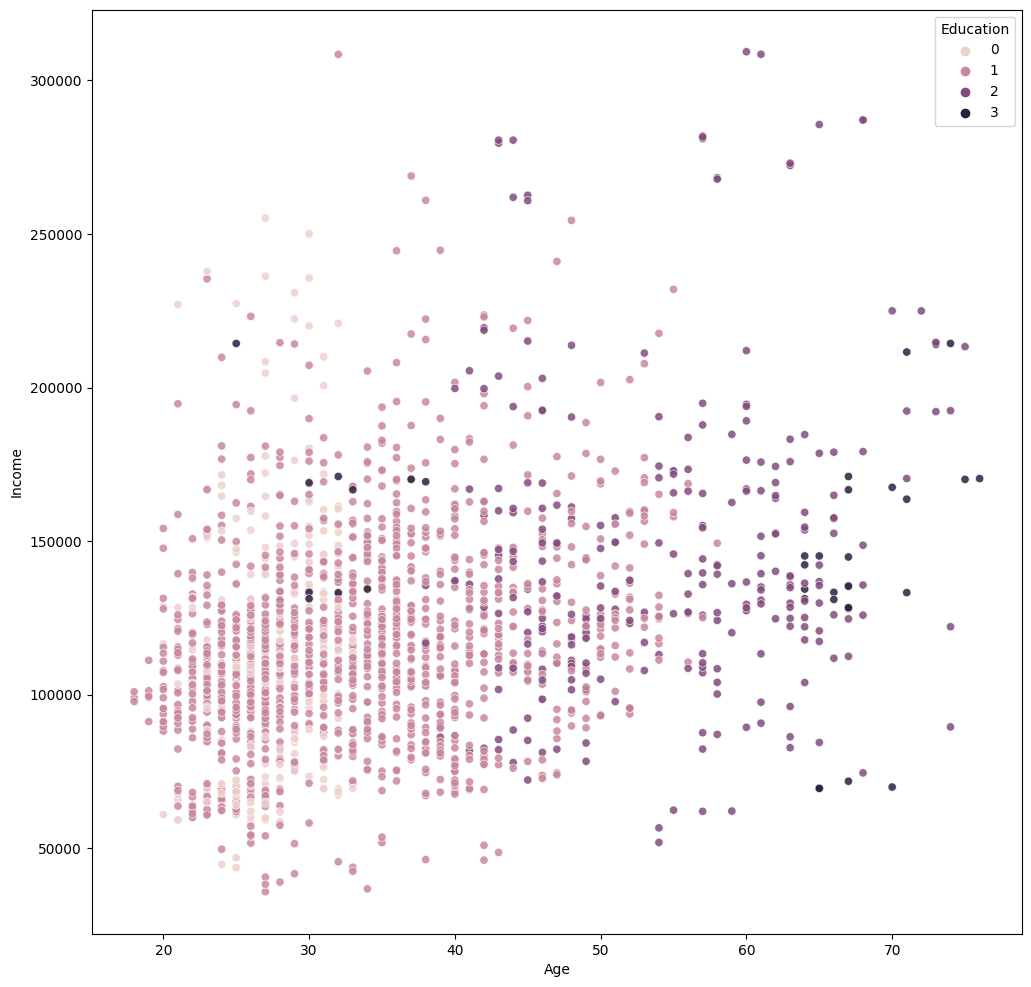

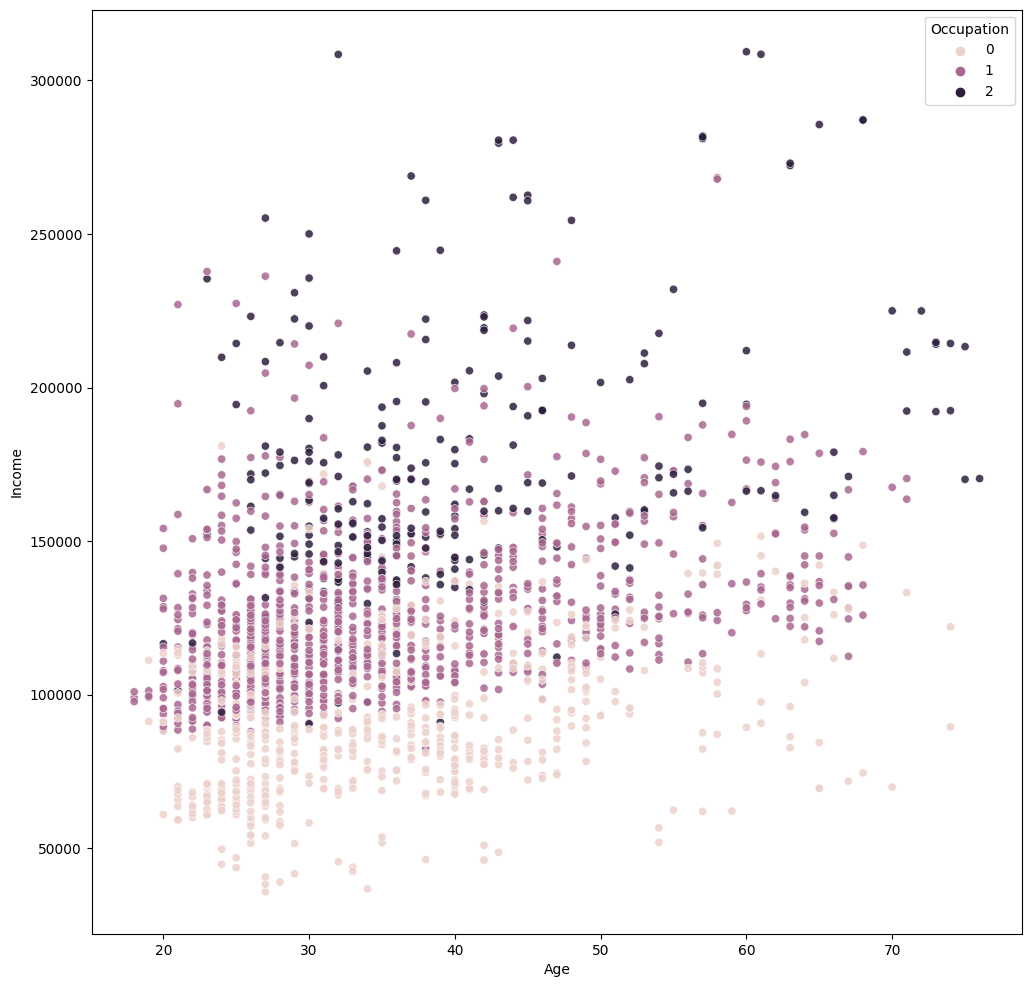

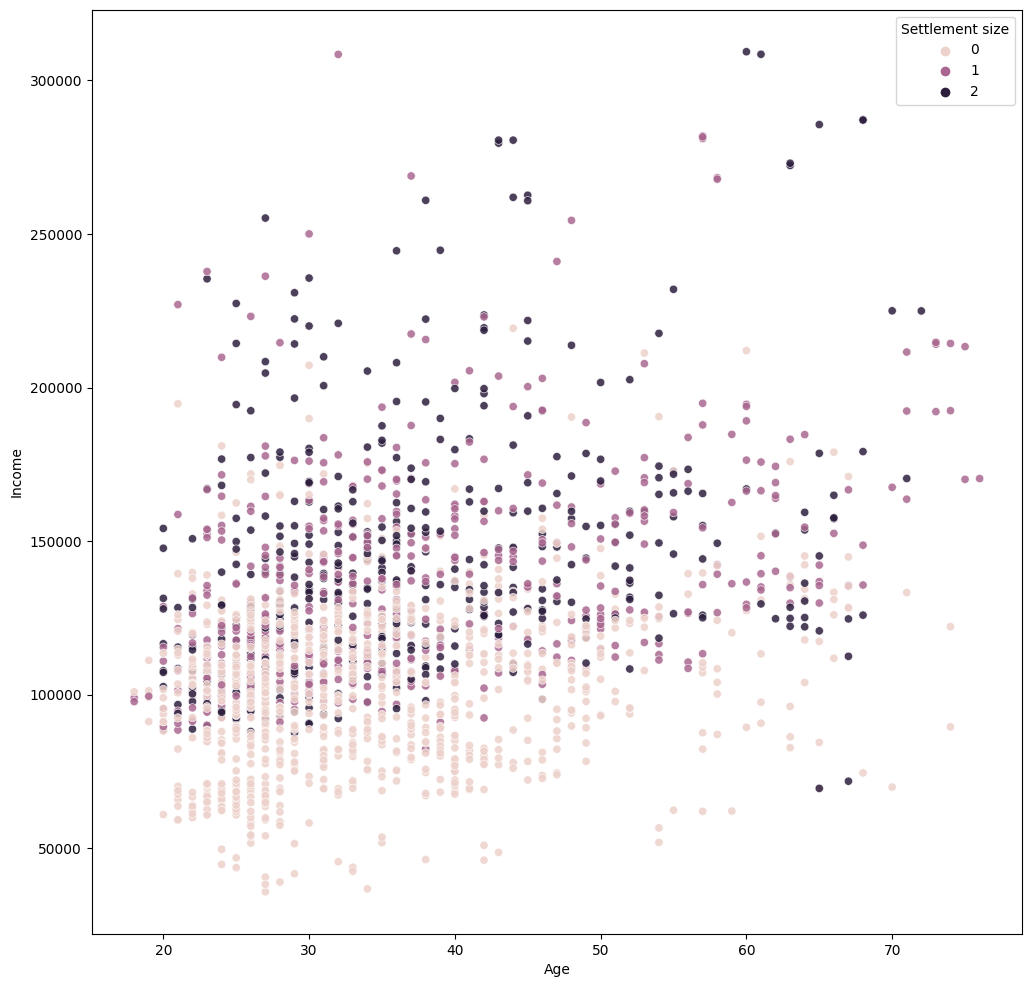

In [100]:
for col in cat_cols:
    bivariate_scatter('Age', 'Income', col, data)

<h3> Feature Transforming and Scaling </h3>

In [200]:
from scipy import stats

In [201]:
income_normality_test = stats.normaltest(data['Income'])[1]
age_normality_test = stats.normaltest(data['Age'])[1]

print(f'The p-value for the null hypothesis of Income being normally distributed is {income_normality_test}')
print(f'The p-value for the null hypothesis of Age being normally distributed is {age_normality_test}')

The p-value for the null hypothesis of Income being normally distributed is 2.5009638879187734e-98
The p-value for the null hypothesis of Age being normally distributed is 3.3428344869999675e-56


In [202]:
stats.normaltest(data['Income'])

NormaltestResult(statistic=449.47332580136424, pvalue=2.5009638879187734e-98)

<h4>K-Means clustering model assumes normallity of distributions, so we need the features to be normalized before feeding them to the model </h4>

<hr>

<h4> Trying Log Transformation </h4>

In [203]:
def apply_log(column):
  return np.log(column)

In [204]:
def normality_test(column):
  return stats.normaltest(column)

In [205]:
print(normality_test(apply_log(data['Income'])))

NormaltestResult(statistic=32.357037046565075, pvalue=9.41366371618838e-08)


<h4> Trying Power Transformation </h4>

In [206]:
from sklearn.preprocessing import PowerTransformer

In [207]:
# reshaping data for fitting into PowerTransformer

reshaped_income = data['Income'].to_numpy().reshape(-1, 1)

power_transformer = PowerTransformer()
transformed_income = power_transformer.fit_transform(reshaped_income)
flattened_income = transformed_income.flatten()
power_transformed_income = pd.Series(data = flattened_income, index = list(range(len(flattened_income))))
power_transformed_income

0       0.239545
1       0.869781
2      -0.846121
3       1.303766
4       0.830970
          ...   
1995    0.209208
1996    0.051991
1997   -0.948374
1998   -0.545364
1999   -1.685848
Length: 2000, dtype: float64

In [208]:
log_transformed_income = apply_log(data['Income'])
log_transformed_income

0       11.733426
1       11.923531
2       11.398748
3       12.052717
4       11.911910
          ...    
1995    11.724199
1996    11.676268
1997    11.366743
1998    11.492396
1999    11.133362
Name: Income, Length: 2000, dtype: float64

<h4> Choosing the best option for the "Income" feature </h4>

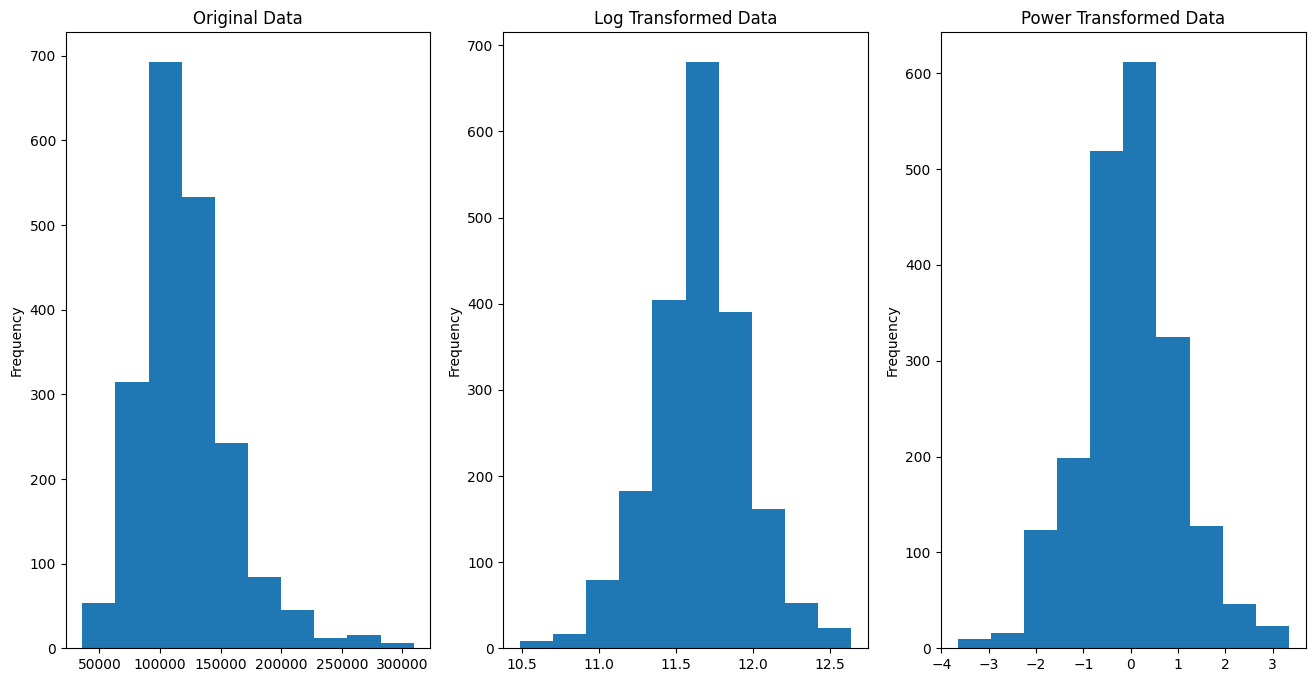

In [209]:
# creating three figures at once
# 1) Original Data
# 2) Log Transformed Data
# 3) Power Transformed Data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))

# Original Data
data['Income'].plot(kind='hist', ax = ax1)
ax1.title.set_text("Original Data")
original_normality_test = normality_test(data['Income'])

# Log Transformed Data
log_transformed_income.plot(kind='hist', ax = ax2)
ax2.title.set_text("Log Transformed Data")
log_transformed_normality_test = normality_test(log_transformed_income)

# Power Transformed Data
power_transformed_income.plot(kind = 'hist', ax = ax3)
ax3.title.set_text("Power Transformed Data")
power_transformed_normality_test = normality_test(power_transformed_income)

normality_test_results = [original_normality_test, log_transformed_normality_test, power_transformed_normality_test]

income_metrics = pd.DataFrame(normality_test_results, index = ['Original Data', "Log Transformed Data", 'Power Transformed Data'])

In [210]:
income_metrics

,statistic,pvalue
Original Data,449.473326,2.500964e-98
Log Transformed Data,32.357037,9.413664e-08
Power Transformed Data,27.859212,8.921730e-07


Power Transformed Data has lowest value for "statistic" column, which makes it a better option compared to others

<h4> Choosing the best option for 'Age" feature</h4>

In [211]:
reshaped_age = data['Age'].to_numpy().reshape(-1, 1)

transformed_age = power_transformer.fit_transform(reshaped_age)
flattened_age = transformed_age.flatten()
power_transformed_age = pd.Series(data = flattened_age, index = list(range(len(flattened_age))))

log_transformed_age = apply_log(data['Age'])



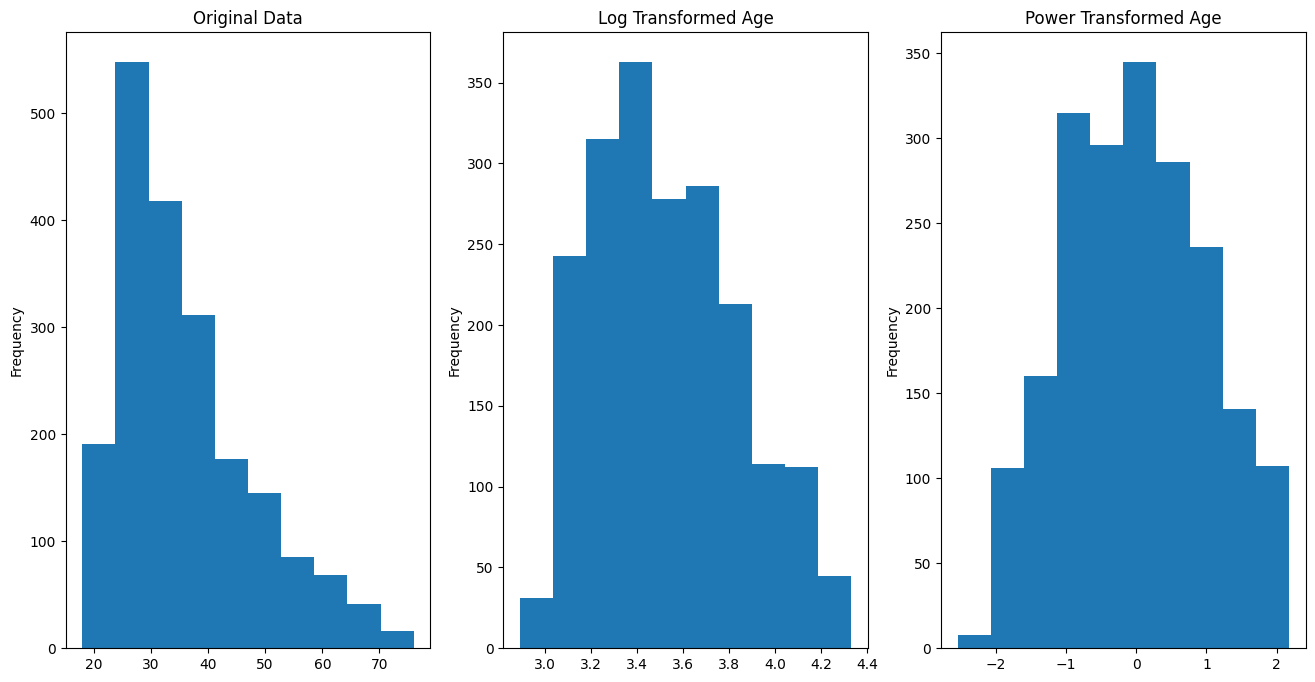

In [212]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 8))

# Original Data Age feature
data['Age'].plot(kind = 'hist', ax = ax1)
ax1.title.set_text('Original Data')
original_age_nt = normality_test(data['Age'])

# Log Transformed Age feature
log_transformed_age.plot(kind = 'hist', ax = ax2)
ax2.title.set_text('Log Transformed Age')
log_age_nt = normality_test(log_transformed_age)

# Power Transformed Age feature
power_transformed_age.plot(kind = 'hist', ax = ax3)
ax3.title.set_text('Power Transformed Age')
power_age_nt = normality_test(power_transformed_age)

normality_test_results = [original_age_nt, log_age_nt, power_age_nt]
age_metrics = pd.DataFrame(normality_test_results, index = ['Original Data', 'Log Transformed Data', 'Power Transformed Data'])

In [213]:
age_metrics

,statistic,pvalue
Original Data,255.475892,3.342834e-56
Log Transformed Data,111.094201,7.519703e-25
Power Transformed Data,161.196197,9.924088e-36


Log Transformed Data has lowest value for "statistic" column, which makes it a better option compared to others

In conclusion: <br>
Income > Power Transformation <br>
Age > Log Transformation <br> <br>
<b> can be used to get the maximum efficiency from the data</b>.


In [214]:
data['transformed_income'] = power_transformed_income
data['transformed_age'] = log_transformed_age
data = data.drop(['Income', 'Age'], axis = 1)
data

,Sex,Marital status,Education,Occupation,Settlement size,transformed_income,transformed_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


<h2> Transformation for categorical variables </h2>

MinMaxScaler can be used for scaling other variables

In [215]:
from sklearn.preprocessing import MinMaxScaler


In [243]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data)
print("The first row of the data looks like: ")
print([i for i in  data.columns ])
print([i for i in X[0]])
X = pd.DataFrame(X, columns = data.columns)
X.rename(columns={'transformed_age':'Age', 'transformed_income':'Income'}, inplace = True)
X = X[['Income', 'Age', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]
X

The first row of the data looks like: 
['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size', 'transformed_income', 'transformed_age']
[0.0, 0.0, 0.6666666666666666, 0.5, 1.0, 0.5565105100466529, 0.9124936943359665]


,Income,Age,Sex,Marital status,Education,Occupation,Settlement size
0,0.556511,0.912494,0.0,0.0,0.666667,0.5,1.0
1,0.646532,0.139320,1.0,1.0,0.333333,0.5,1.0
2,0.401437,0.695276,0.0,0.0,0.333333,0.0,0.0
3,0.708521,0.636153,0.0,0.0,0.333333,0.5,0.5
4,0.640988,0.749756,0.0,0.0,0.333333,0.5,0.5
...,...,...,...,...,...,...,...
1995,0.552177,0.666344,1.0,0.0,0.333333,0.0,0.0
1996,0.529721,0.281502,1.0,1.0,0.333333,0.5,0.0
1997,0.386831,0.377416,0.0,0.0,0.000000,0.0,0.0
1998,0.444396,0.199729,1.0,1.0,0.333333,0.0,0.0


<h1> Clustering (K-means) </h1>

In [118]:
from sklearn.cluster import KMeans

In [119]:
cluster_range = [i for i in range(2, 20)]
inertias = []

for c in cluster_range:
  kmeans = KMeans(n_clusters = c, random_state = 666).fit(X)
  inertias.append(kmeans.inertia_)



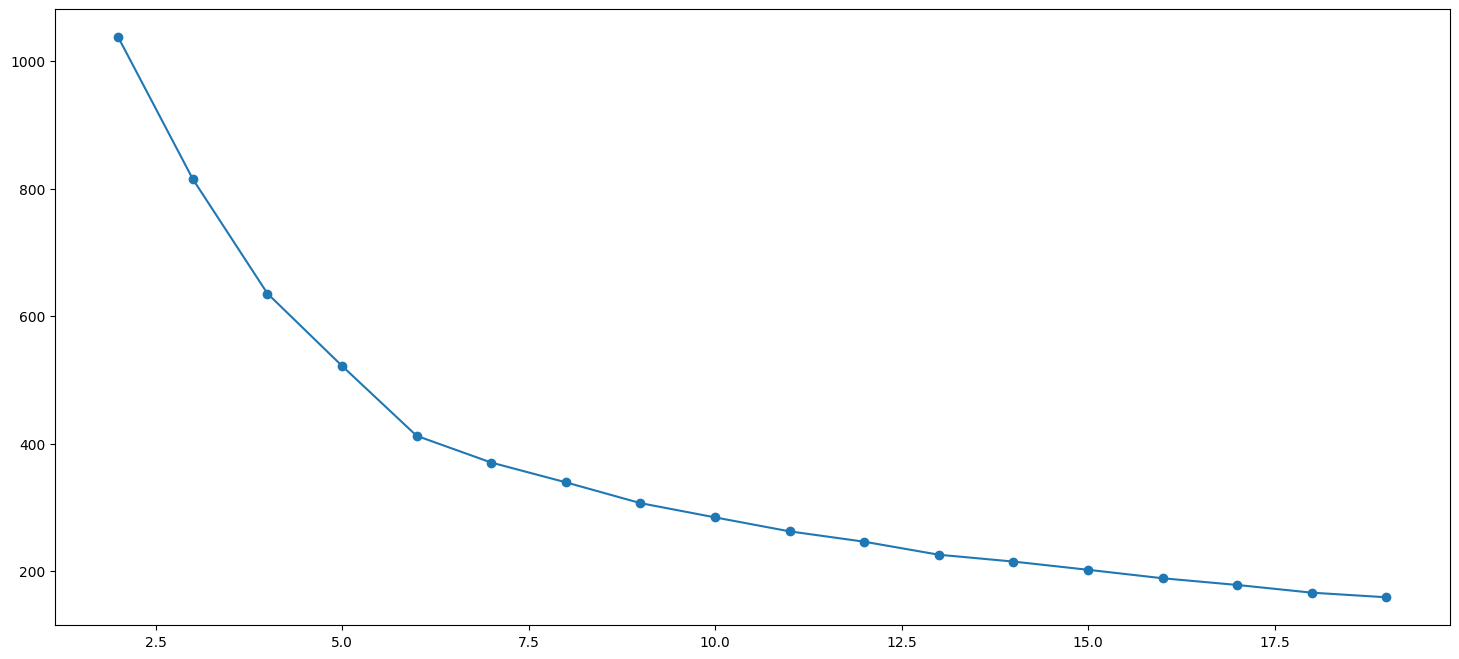

In [120]:
plt.figure(figsize = (18, 8))
plt.plot(cluster_range, inertias, marker= 'o')

The Elbow methods points to cluster number of 6-7. So, 6 seems to be an appropriate number of clusters

<h2> PCA - Principal Component Analysis</h2>

In [222]:
from sklearn.decomposition import PCA

In [223]:
pca = PCA(n_components = 3, random_state = 666)
X_pca = pca.fit_transform(X)

In [224]:
X_pca_df = pd.DataFrame(data = X_pca, columns = ['X1', 'X2', 'X3'])

In [225]:
X_pca_df

,X1,X2,X3
0,0.829143,0.350518,-0.162403
1,-0.531854,0.719504,-0.230299
2,0.489493,-0.693627,0.175269
3,0.712487,-0.027906,-0.049583
4,0.718334,-0.036815,-0.052850
...,...,...,...
1995,-0.188657,-0.674905,-0.559832
1996,-0.794289,-0.009952,-0.008375
1997,0.492095,-0.748275,0.192757
1998,-0.881738,-0.282777,0.097842


In [226]:
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(X)

In [227]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [228]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [229]:
X_pca_df.head()

,X1,X2,X3,Labels
0,0.829143,0.350518,-0.162403,3
1,-0.531854,0.719504,-0.230299,2
2,0.489493,-0.693627,0.175269,0
3,0.712487,-0.027906,-0.049583,3
4,0.718334,-0.036815,-0.052850,3


In [230]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

In [231]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [232]:
results_df = data.drop(['transformed_income', 'transformed_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Education        2000 non-null   int32
 3   Occupation       2000 non-null   int32
 4   Settlement size  2000 non-null   int32
 5   Labels           2000 non-null   int32
dtypes: int32(6)
memory usage: 47.0 KB


In [249]:
final_data = X
final_data['Labels'] = results_df['Labels']
final_data
final_data.to_csv('classification_data.csv', index = False)

<h3>Summary statistics for each clusters </h3>

In [192]:
summary = {}

for index in range(6):
  summary[index] = results_df[results_df['Labels'] == index].describe().T

<h3> Cluster 1 </h3>

In [193]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Income,312.0,-0.498122,0.852210,-3.064014,-1.122387,-0.364156,0.124993,2.141635
Age,312.0,3.588665,0.271783,3.044522,3.392722,3.583519,3.737670,4.304065
Sex,312.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Marital status,312.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Education,312.0,0.737179,0.579524,0.000000,0.000000,1.000000,1.000000,2.000000
Occupation,312.0,0.365385,0.501913,0.000000,0.000000,0.000000,1.000000,2.000000
Settlement size,312.0,0.060897,0.239526,0.000000,0.000000,0.000000,0.000000,1.000000
Labels,312.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Marital status'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Settlement size'}>,
        <AxesSubplot:title={'center':'Labels'}>]], dtype=object)

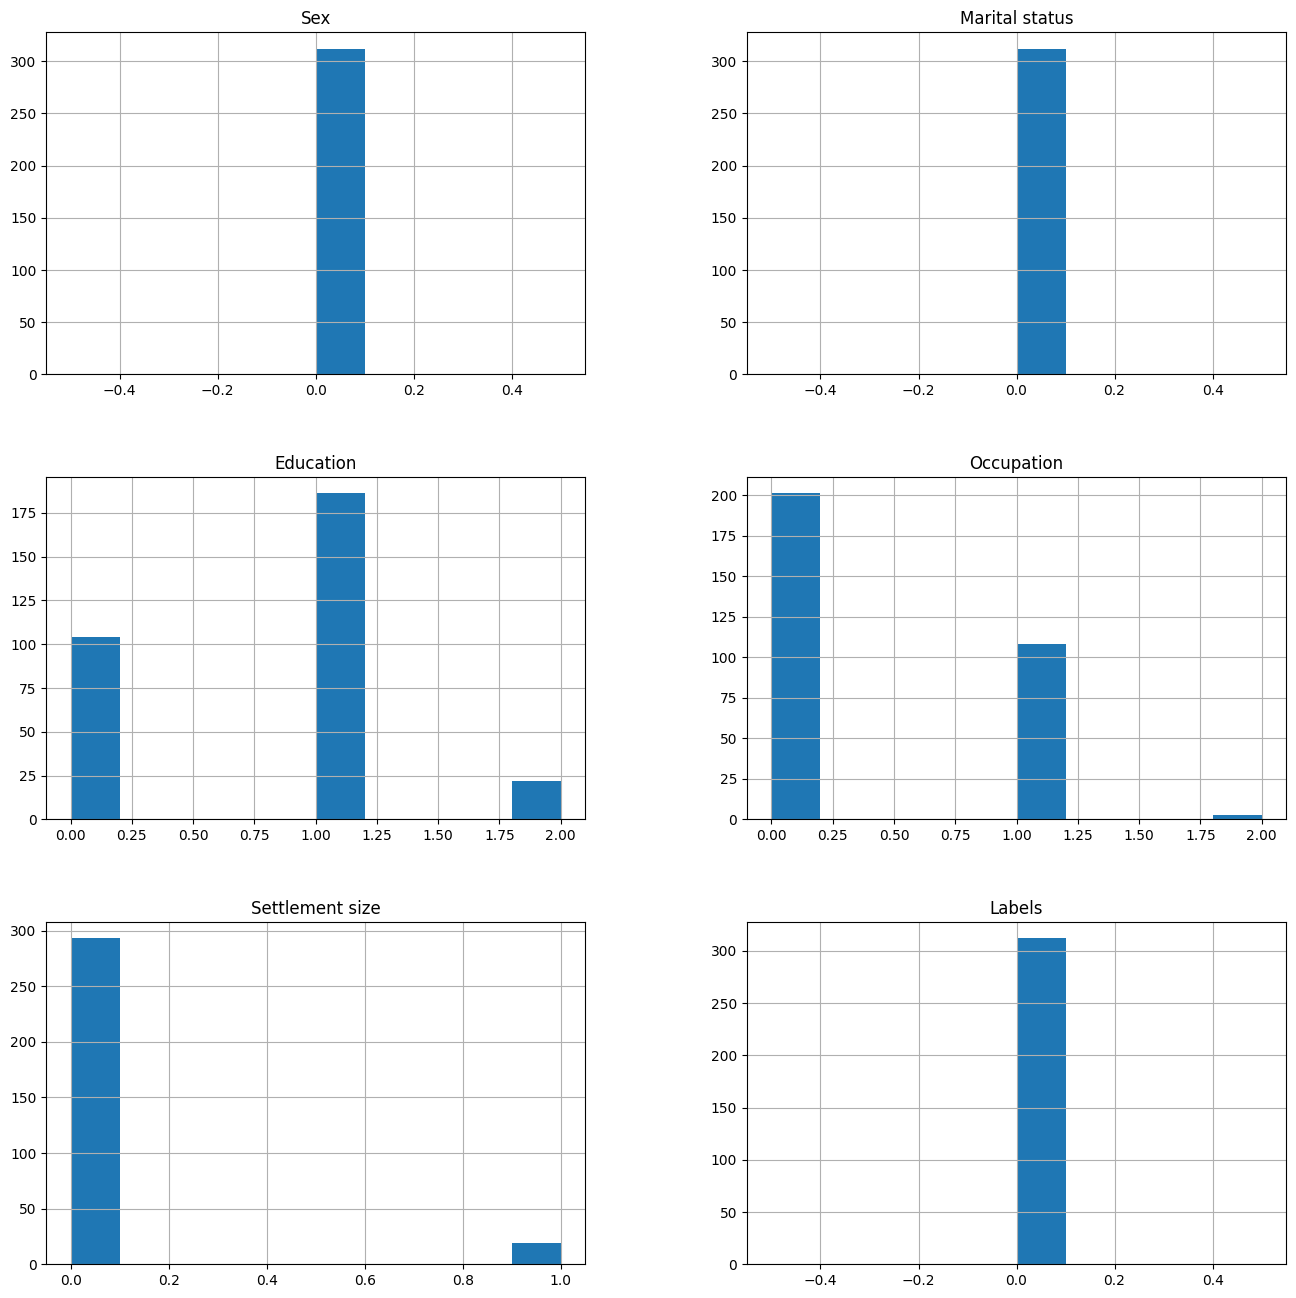

In [135]:
results_df[results_df['Labels'] == 0].hist(figsize = (16, 16))

In [ ]:
results_df['Labels'].value_counts()

3    517
1    430
0    312
2    306
4    257
5    178
Name: Labels, dtype: int64

<h3> Classification </h3> 

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz




print("All libraries have been installed/imported successfully!!!")


All libraries have been installed/imported successfully!!!


In [251]:
X = final_data.drop(columns = ['Labels'], axis = 1)
X

,Income,Age,Sex,Marital status,Education,Occupation,Settlement size
0,0.556511,0.912494,0.0,0.0,0.666667,0.5,1.0
1,0.646532,0.139320,1.0,1.0,0.333333,0.5,1.0
2,0.401437,0.695276,0.0,0.0,0.333333,0.0,0.0
3,0.708521,0.636153,0.0,0.0,0.333333,0.5,0.5
4,0.640988,0.749756,0.0,0.0,0.333333,0.5,0.5
...,...,...,...,...,...,...,...
1995,0.552177,0.666344,1.0,0.0,0.333333,0.0,0.0
1996,0.529721,0.281502,1.0,1.0,0.333333,0.5,0.0
1997,0.386831,0.377416,0.0,0.0,0.000000,0.0,0.0
1998,0.444396,0.199729,1.0,1.0,0.333333,0.0,0.0


In [252]:
y = final_data['Labels']
y

0       3
1       2
2       0
3       3
4       3
       ..
1995    5
1996    1
1997    0
1998    1
1999    0
Name: Labels, Length: 2000, dtype: int32

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [254]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [255]:
y_pred = model.predict(X_test)

In [256]:
model_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {model_accuracy}')

Accuracy: 0.9966666666666667


<h4> Somehow, the model seem extremely accurate. Therefore, there is no need for hyperparameter tuning.</h4>

In [257]:
model_confusion_matrix = confusion_matrix(y_test, y_pred)

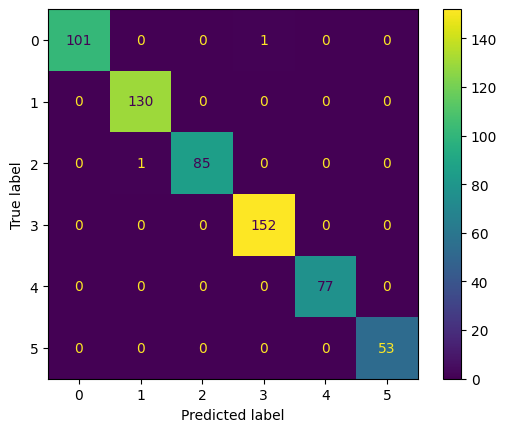

In [258]:
ConfusionMatrixDisplay(confusion_matrix = model_confusion_matrix).plot()

In [260]:
pickle.dump(model, open('model.pkl', 'wb'))

In [261]:
final_data.columns

Index(['Income', 'Age', 'Sex', 'Marital status', 'Education', 'Occupation',
       'Settlement size', 'Labels'],
      dtype='object')

In [ ]:
def income_scaler(income):
    return 

In [ ]:
query = {
    'Income' : ,
    'Age'
    'Sex' : [0],
    'Marital status' : [1],	
    'Education' : [2],	
    'Occupation': [0],	
    'Settlement size' : [0],

}

query = pd.DataFrame.from_dict(query)
query


,Sex,Marital status,Education,Occupation,Settlement size
0,0,1,2,0,0


In [ ]:
model.predict(query)[0]

4

<h3> Nice, The model works successfully </h3>

In [ ]:
model.predict_proba(query)

array([[0., 0., 0., 0., 1., 0.]])